**What is this project about?**

  - In this project, heart data is used, the target of which is in two classes. People who have heart disease and people who don't. The importance of this type of project in the medical world is very high and it should be given more attention. In this kernel, We created a predictive model with the help of different classification algorithms so that people can be predicted to have or not have a disease.

**Libraries that we need**

  - In this project, We used numpy, pandas, matplotlib, seaborn and some sklearn packages.
    


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

**Table of Content**

In [2]:
Main_Dataset = pd.read_csv('heart.csv')
Main_Dataset = pd.DataFrame(Main_Dataset)

In [3]:
print(Main_Dataset.shape)
Main_Dataset.head(10)

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Data desciption:**

  - With a simple, easy an excellent "def describe" function that is below, we can extract some interesting results.
    Such as name of variables, type of variables, count of them, how many unique values are here, count of missing values and min,max of each column.

In [4]:
def describe(Main_Dataset):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    
    for item in Main_Dataset.columns:
        variables.append(item)
        dtypes.append(Main_Dataset[item].dtype)
        count.append(len(Main_Dataset[item]))
        unique.append(len(Main_Dataset[item].unique()))
        missing.append(Main_Dataset[item].isna().sum())
        
        if Main_Dataset[item].dtypes == 'float64' or Main_Dataset[item].dtypes == 'int64':
            min_.append(Main_Dataset[item].min())
            max_.append(Main_Dataset[item].max())
        else:
            min_.append('Str')
            max_.append('Str')
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })    
        
    return output

In [5]:
desc_df = describe(Main_Dataset)
desc_df

,variable,dtype,count,unique,missing value,Min,Max
0,age,int64,303,41,0,29.0,77.0
1,sex,int64,303,2,0,0.0,1.0
2,cp,int64,303,4,0,0.0,3.0
3,trtbps,int64,303,49,0,94.0,200.0
4,chol,int64,303,152,0,126.0,564.0
5,fbs,int64,303,2,0,0.0,1.0
6,restecg,int64,303,3,0,0.0,2.0
7,thalachh,int64,303,91,0,71.0,202.0
8,exng,int64,303,2,0,0.0,1.0
9,oldpeak,float64,303,40,0,0.0,6.2


**Variable Explanation:**

  

  - Age : Age of the patient

  - Sex : Sex of the patient

  - exang: exercise induced angina (1 = yes; 0 = no)

  - caa: number of major vessels (0-4)

  - cp : Chest Pain type chest pain type
     -  Value 1: typical angina
     -  Value 2: atypical angina
     -  Value 3: non-anginal pain
     -  Value 4: asymptomatic

  - trtbps : resting blood pressure (in mm Hg)

  - chol : cholestoral in mg/dl fetched via BMI sensor

  - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

  - rest_ecg : resting electrocardiographic results
      - Value 0: normal
      - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

  - thalach : maximum heart rate achieved
   
  - target : 0= less chance of heart attack 1= more chance of heart attack


**Noise Detection:**

  - We can use boxplots in continuous variables for detect any noises.

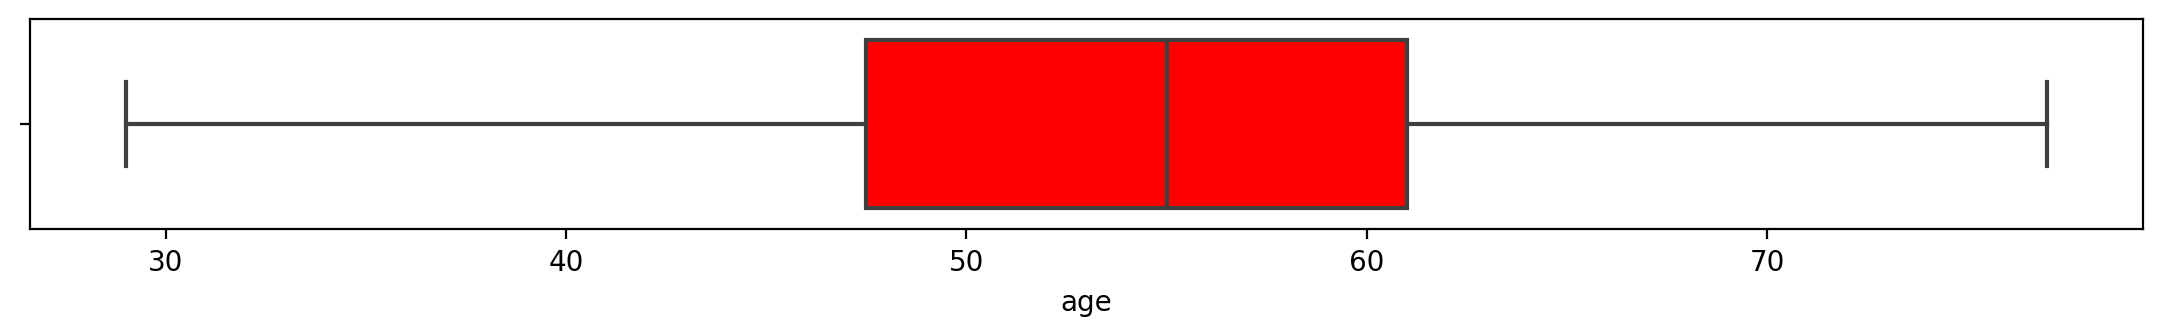

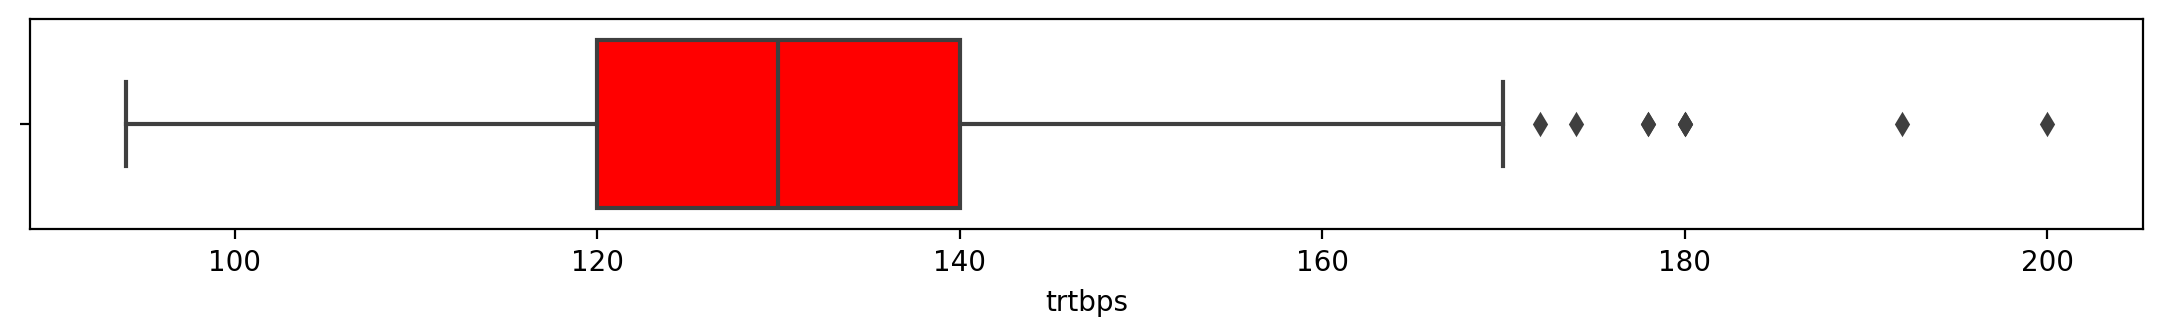

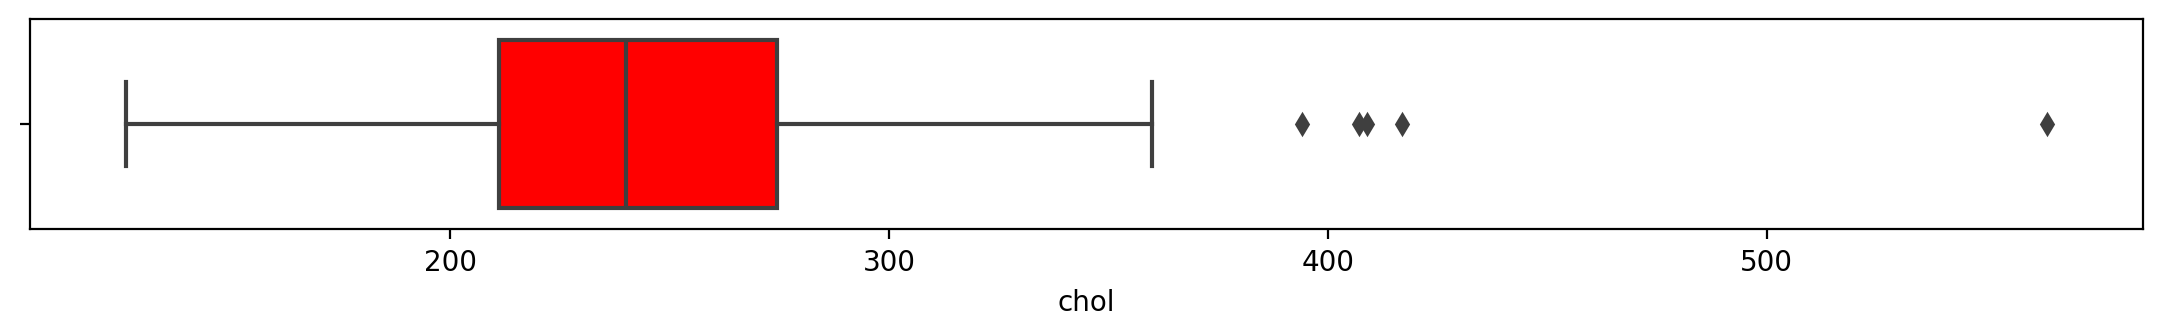

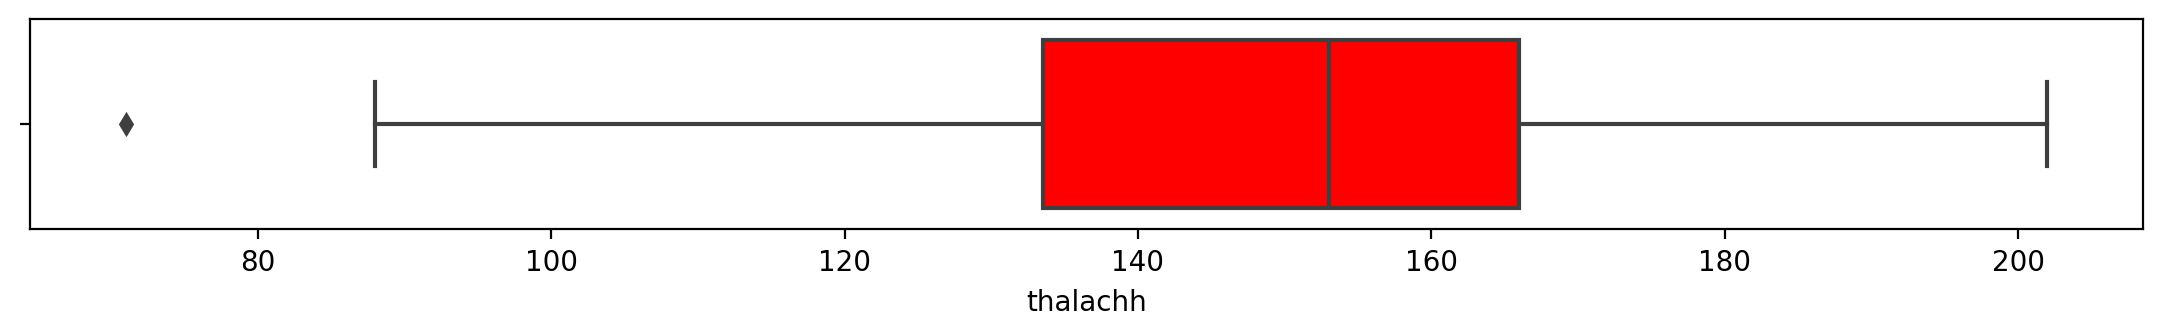

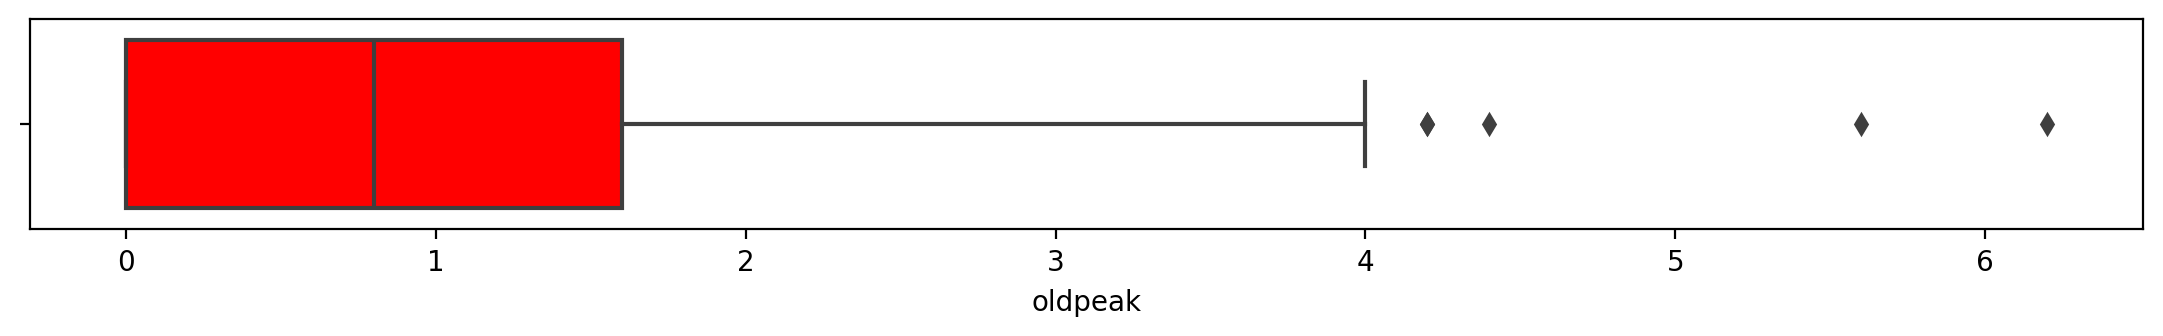

In [6]:
Numerical = ['age', 'trtbps','chol','thalachh','oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = Main_Dataset,
           boxprops = dict(facecolor = 'Red'))
    i += 1
    plt.show()

In [7]:
Chol_noise = Main_Dataset[Main_Dataset["chol"]>3].index
Chol_noise

RangeIndex(start=0, stop=303, step=1)

In [8]:
Main_Dataset.drop(index=[85], inplace=True)
Main_Dataset.shape

(302, 14)

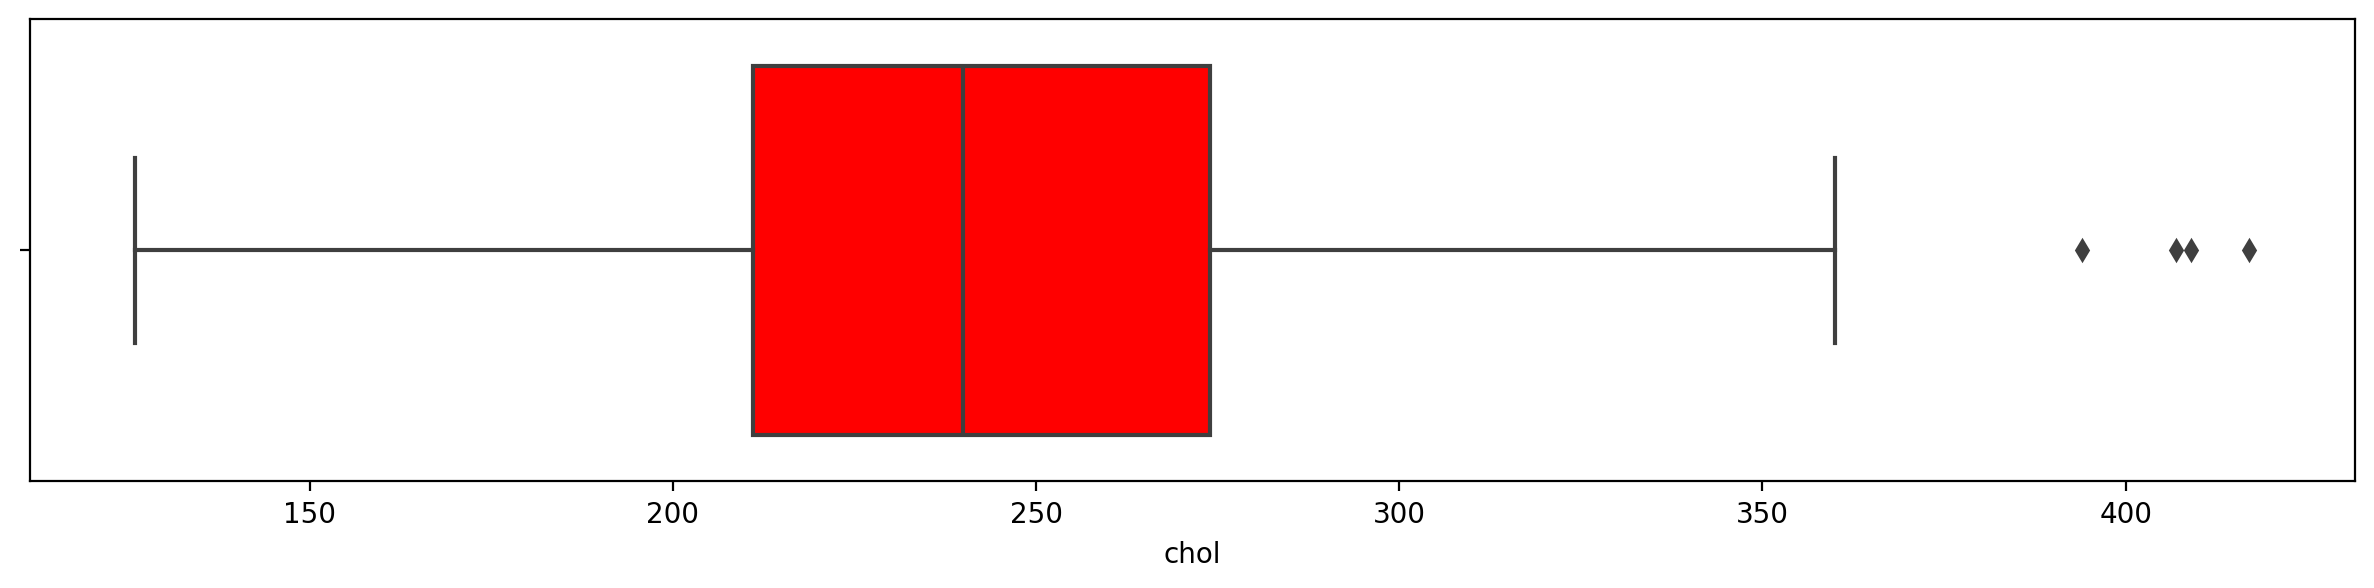

In [9]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'chol', data = Main_Dataset,
        boxprops = dict(facecolor = 'Red'))
    
plt.show()

**Seperation Dataset:**

  - Let's devide dataset to two parts for analysis. 1: People that don't have heart disease and 2: People who have it.



In [10]:
Target_0_data = Main_Dataset[Main_Dataset["output"]==0]
Target_0_data = pd.DataFrame(Target_0_data)
Target_1_data = Main_Dataset[Main_Dataset["output"]==1]
Target_1_data = pd.DataFrame(Target_1_data)
print("The shape of data when target is '0': Not disease",Target_0_data.shape)
print("The shape of data when target is '1': Disease",Target_1_data.shape)

The shape of data when target is '0': Not disease (138, 14)
The shape of data when target is '1': Disease (164, 14)


In [11]:
Target_0_data.sort_values(by=['age'], inplace=True)
Target_1_data.sort_values(by=['age'], inplace=True)

**Visualization:**

  - In this part of visualization, We used "sns.barplot" for different variables vs "age".
    We can see how the rate of change is affected by age.



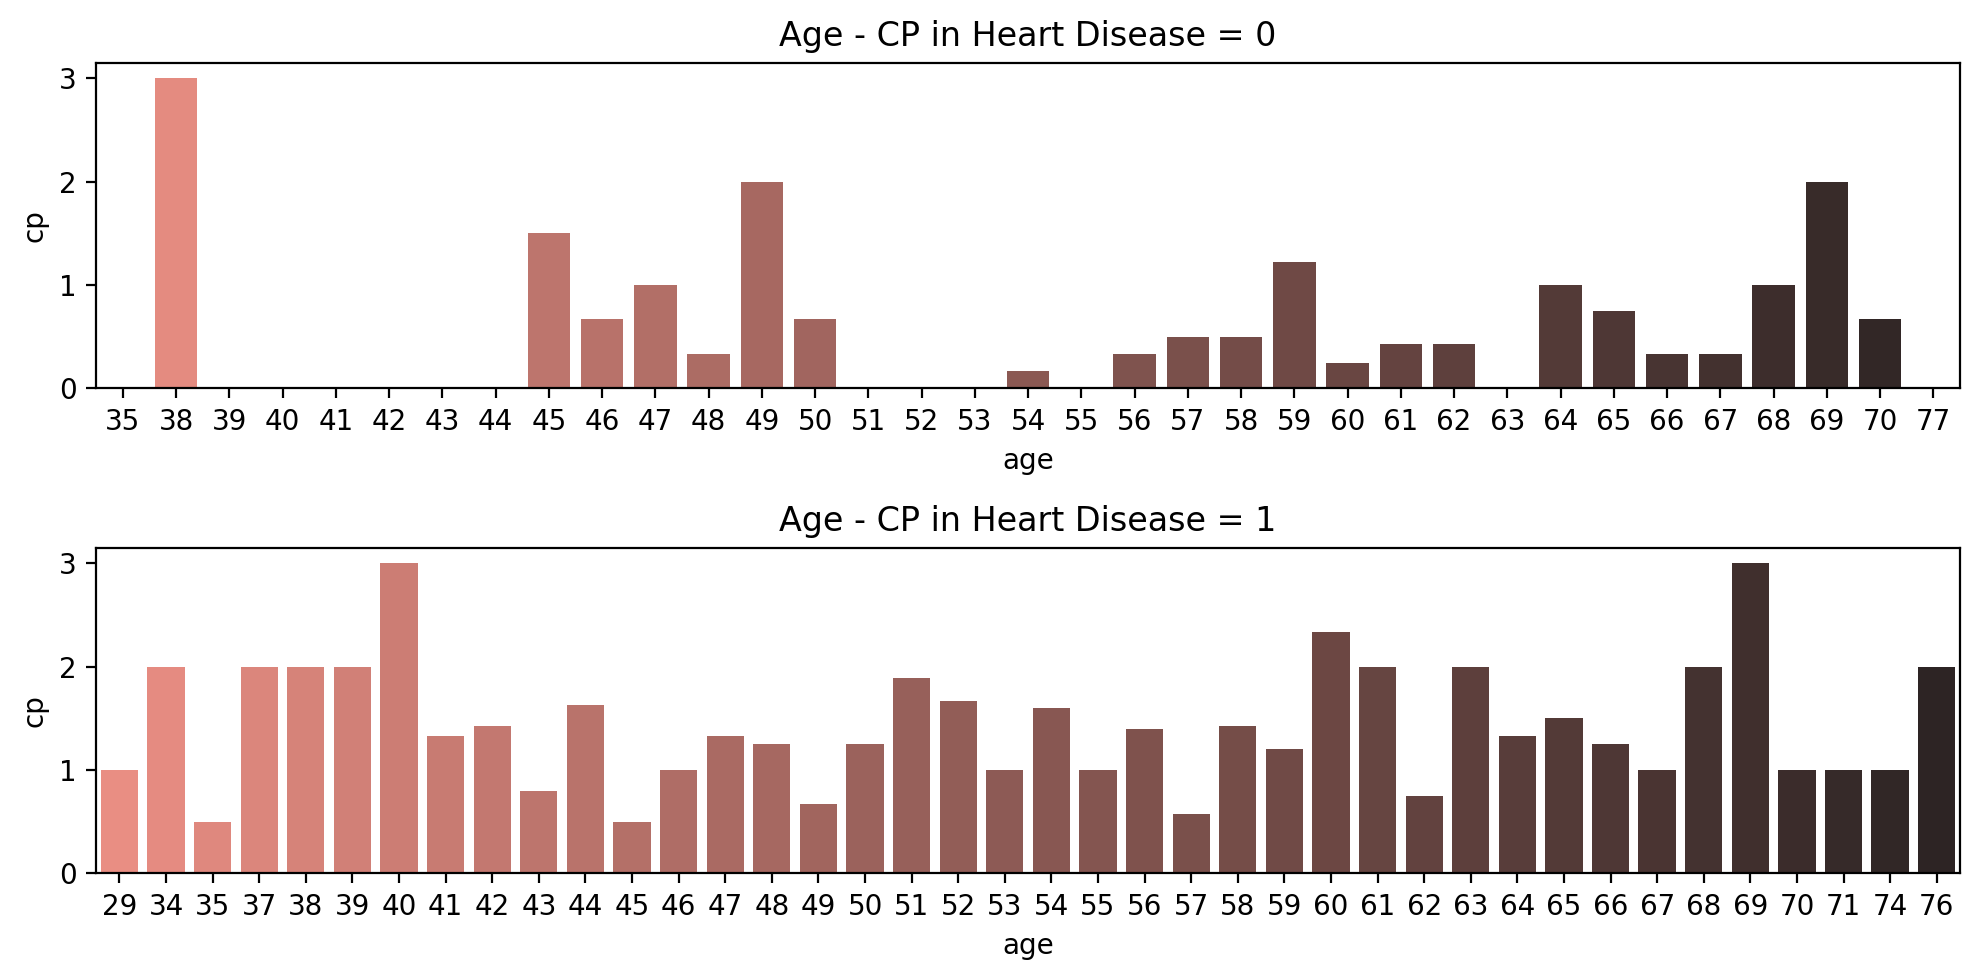

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - CP in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - CP in Heart Disease = 1')


plt.tight_layout()

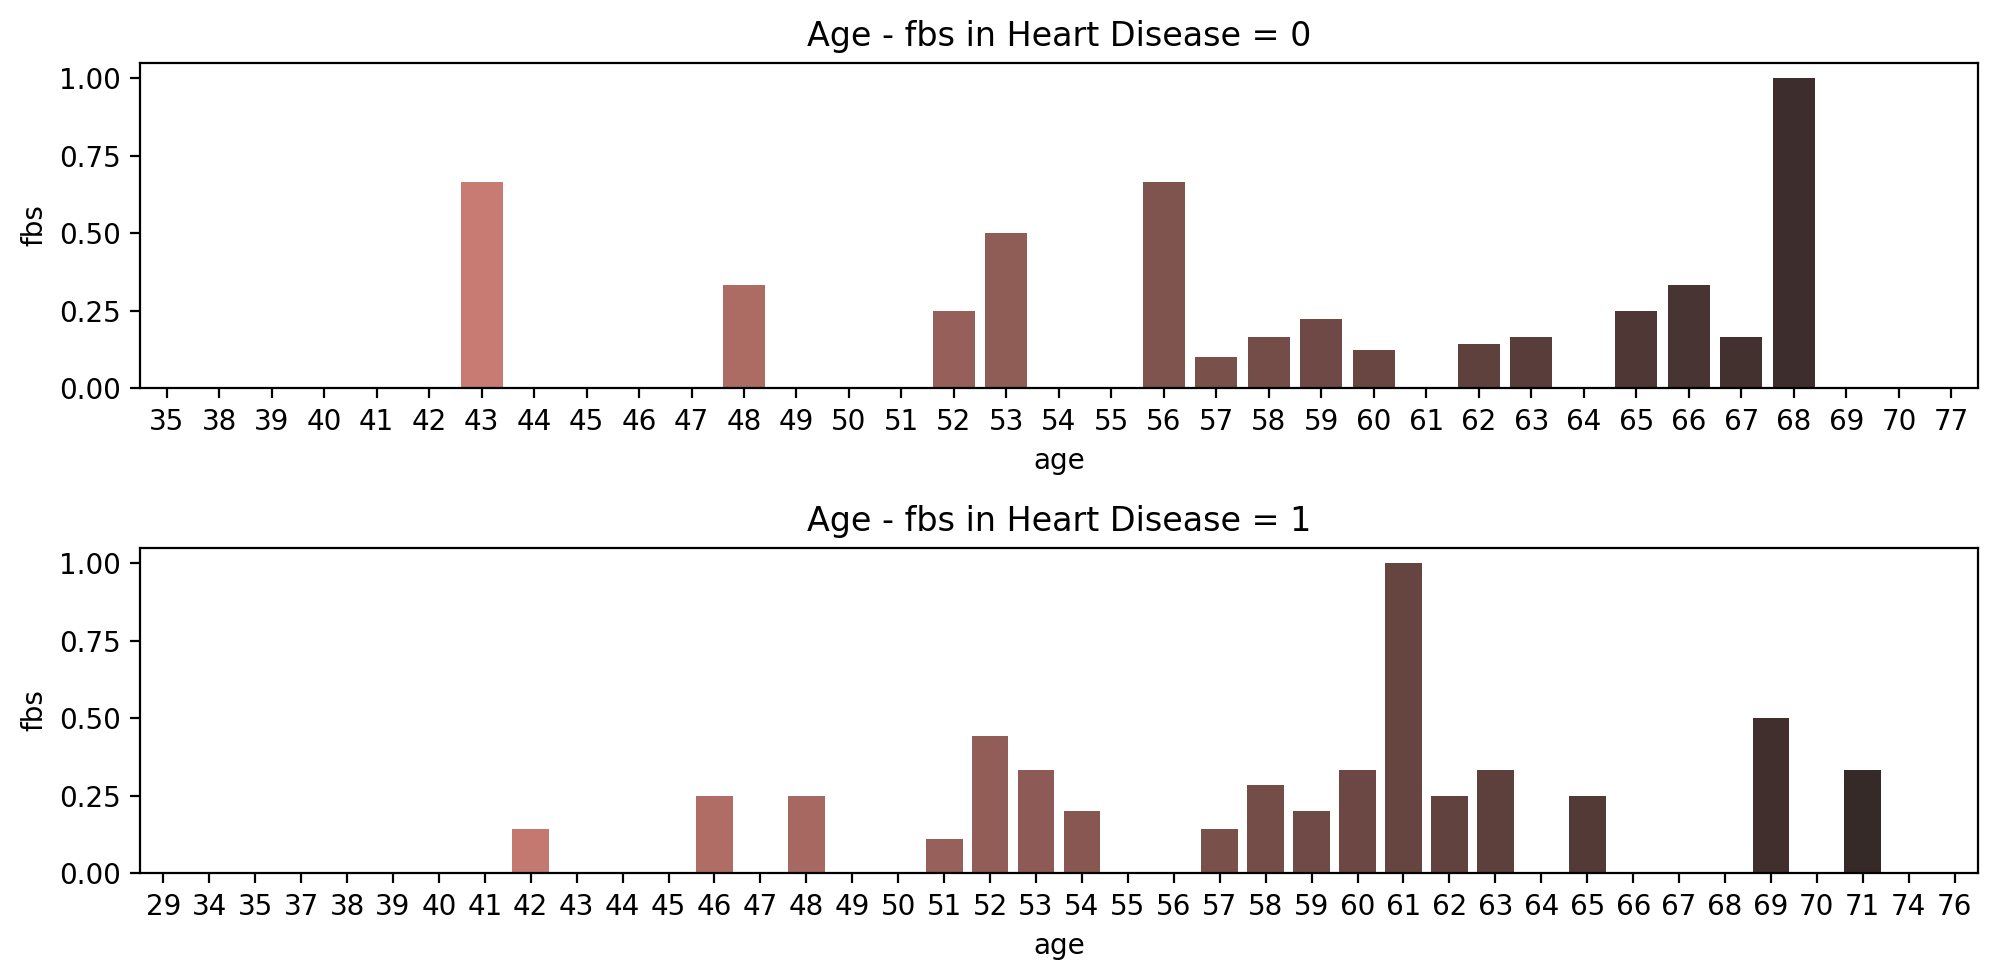

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - fbs in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - fbs in Heart Disease = 1')


plt.tight_layout()

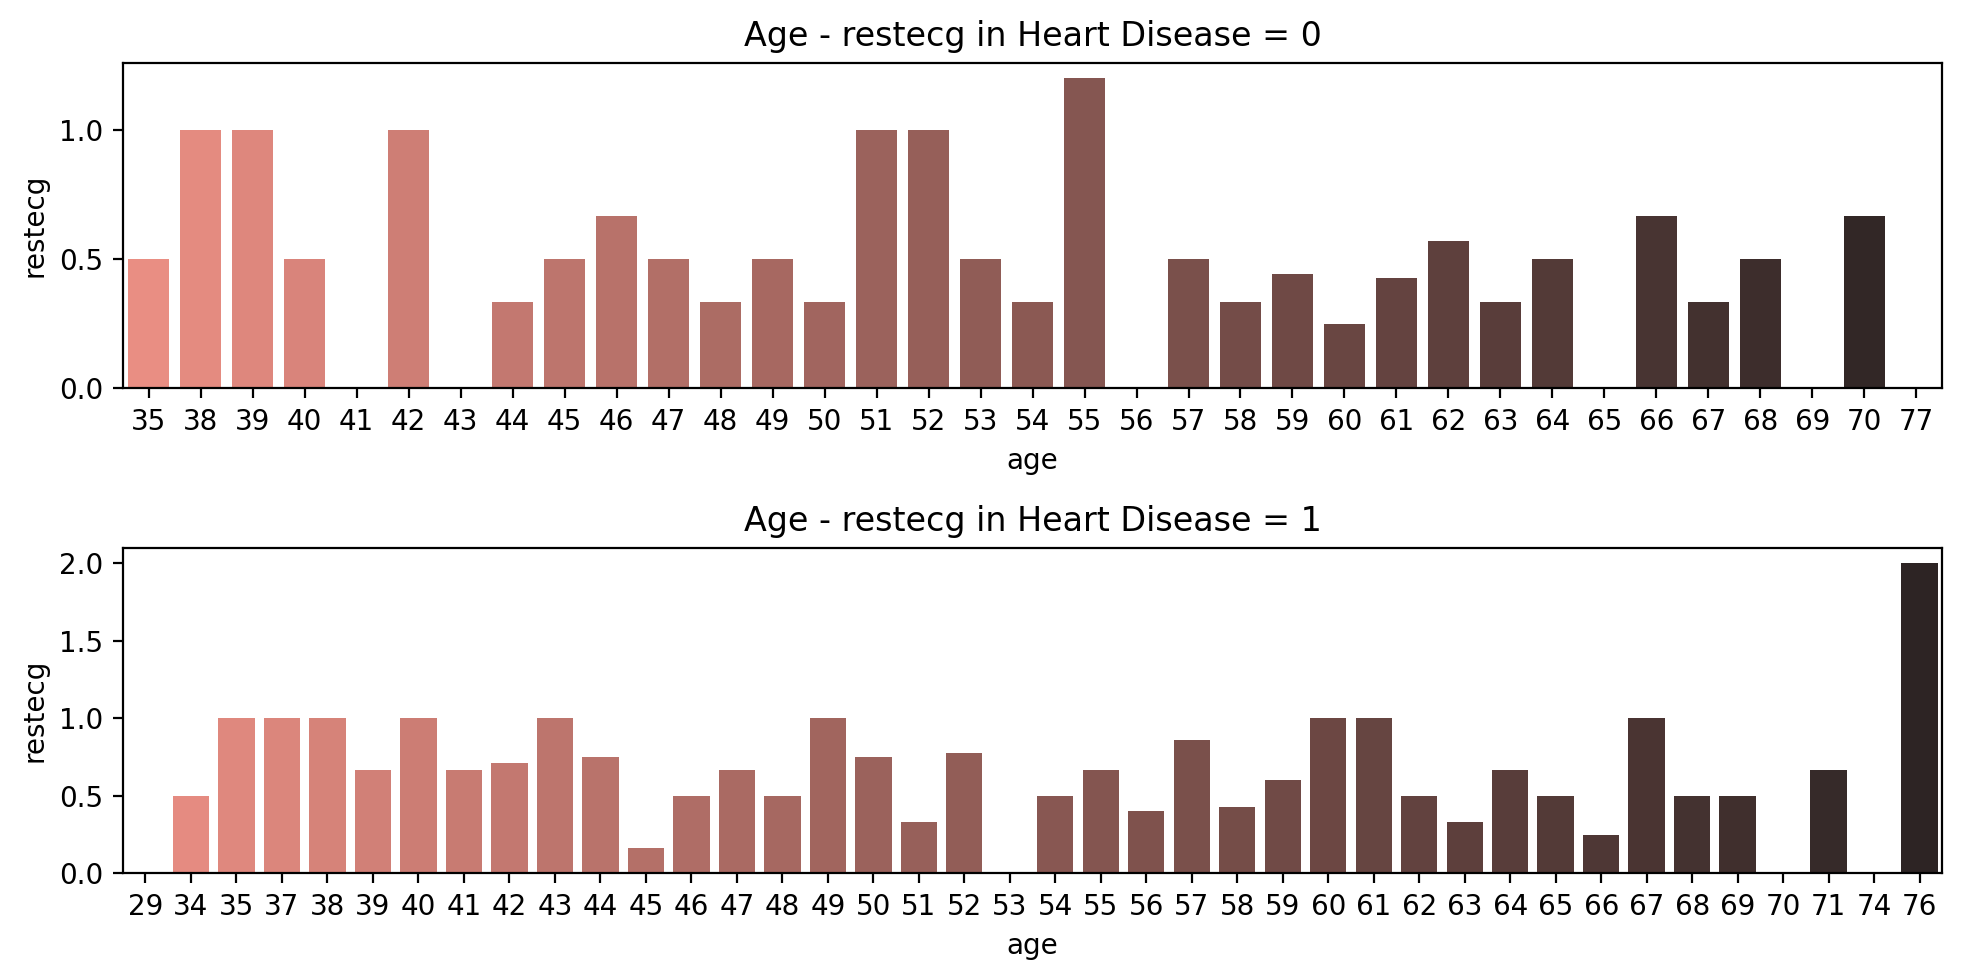

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - restecg in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - restecg in Heart Disease = 1')


plt.tight_layout()

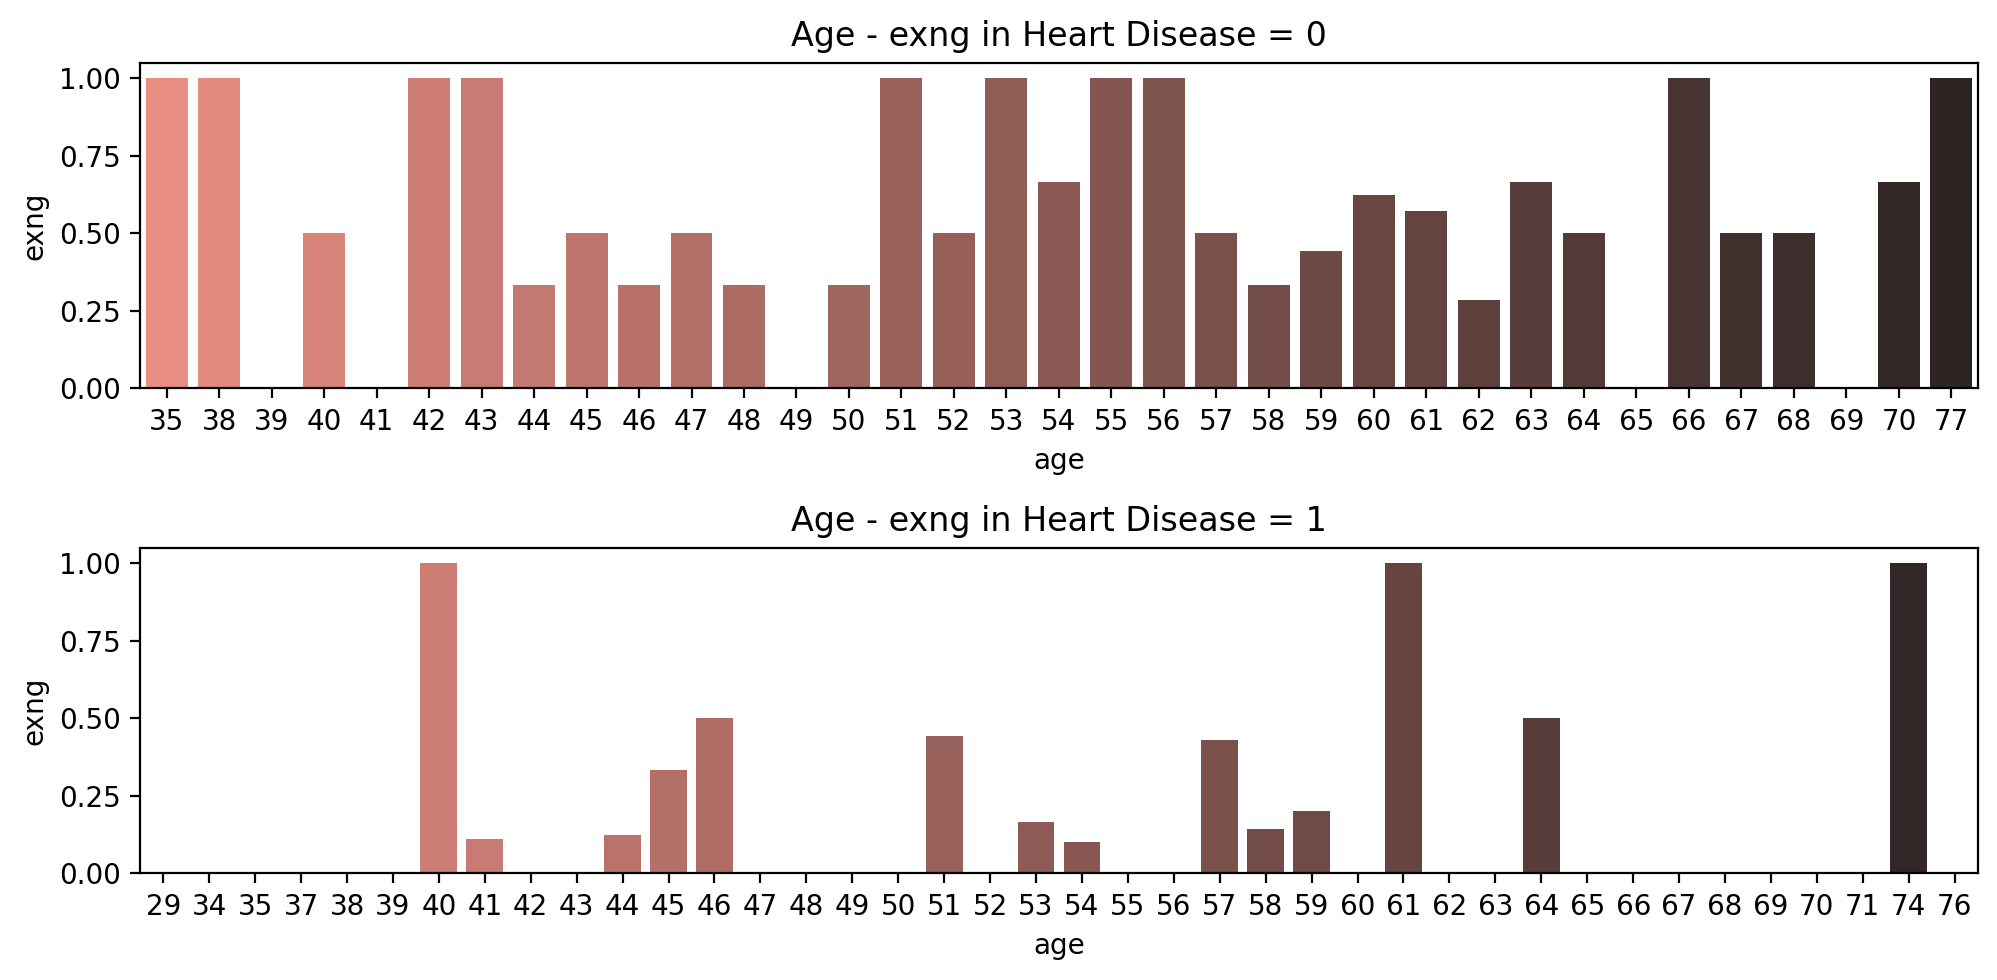

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - exng in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - exng in Heart Disease = 1')


plt.tight_layout()

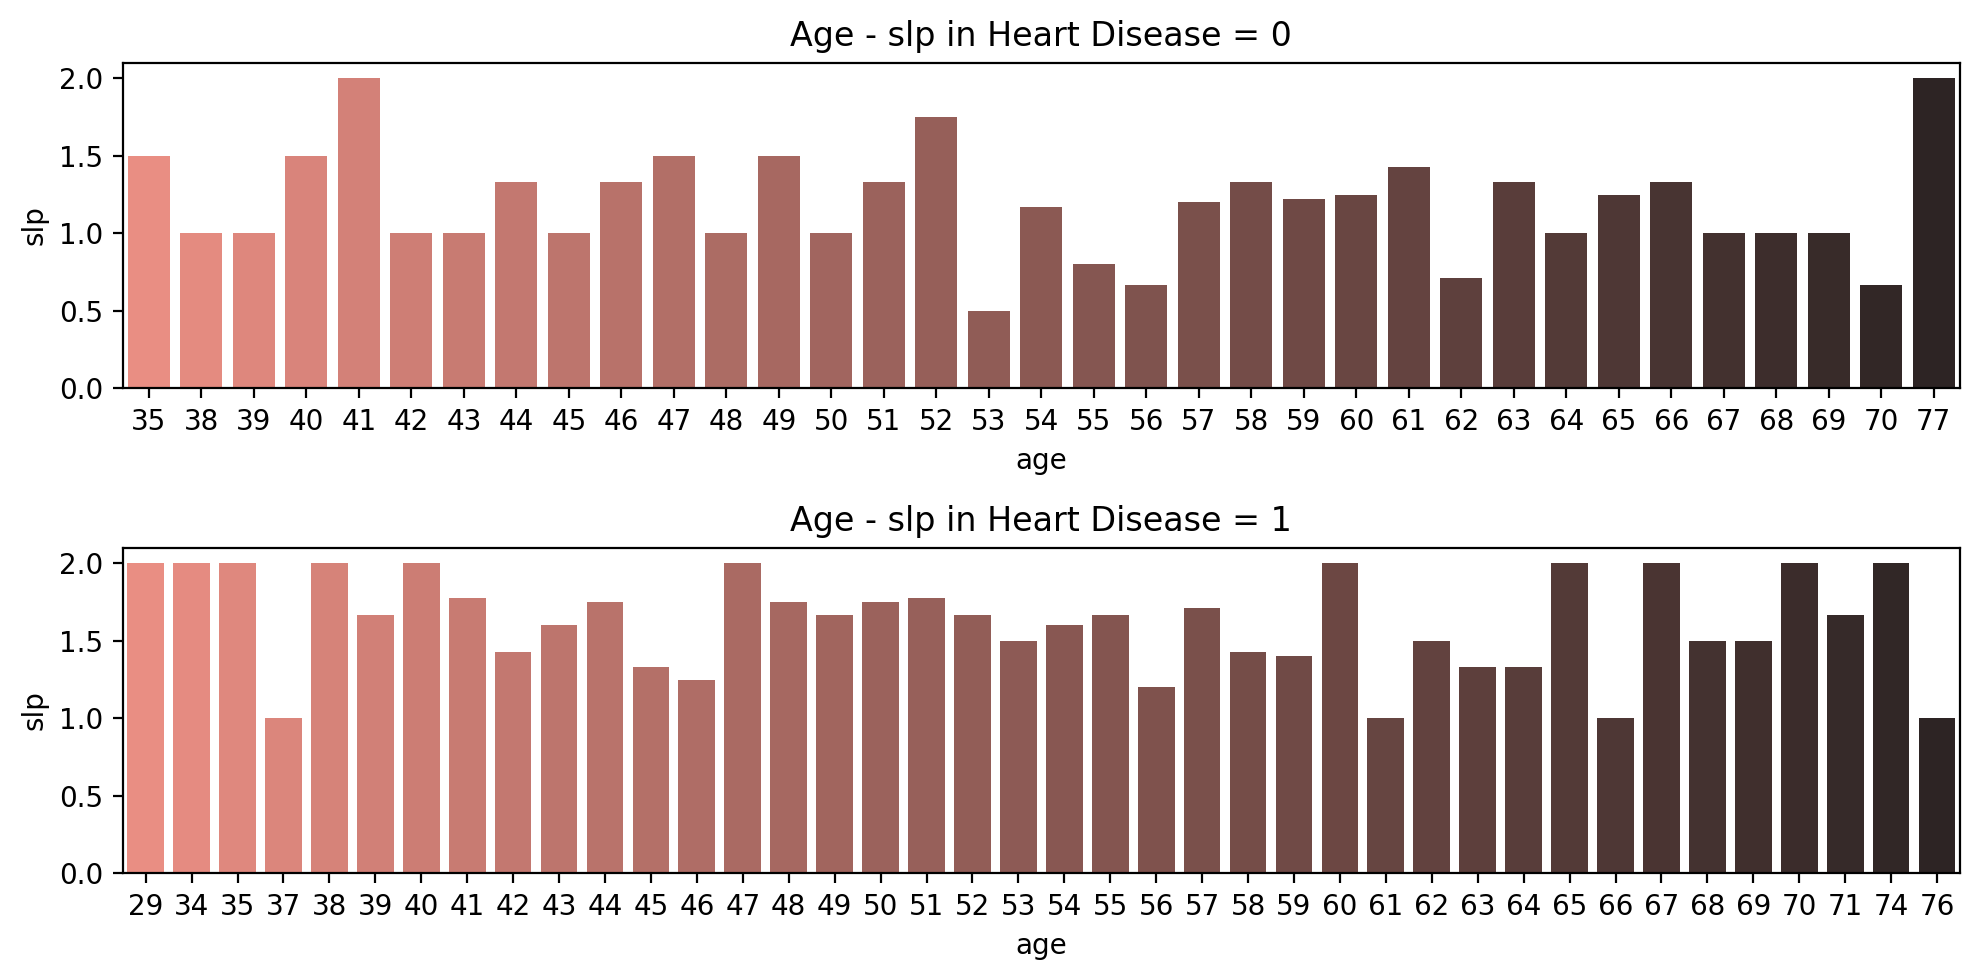

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - slp in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - slp in Heart Disease = 1')


plt.tight_layout()

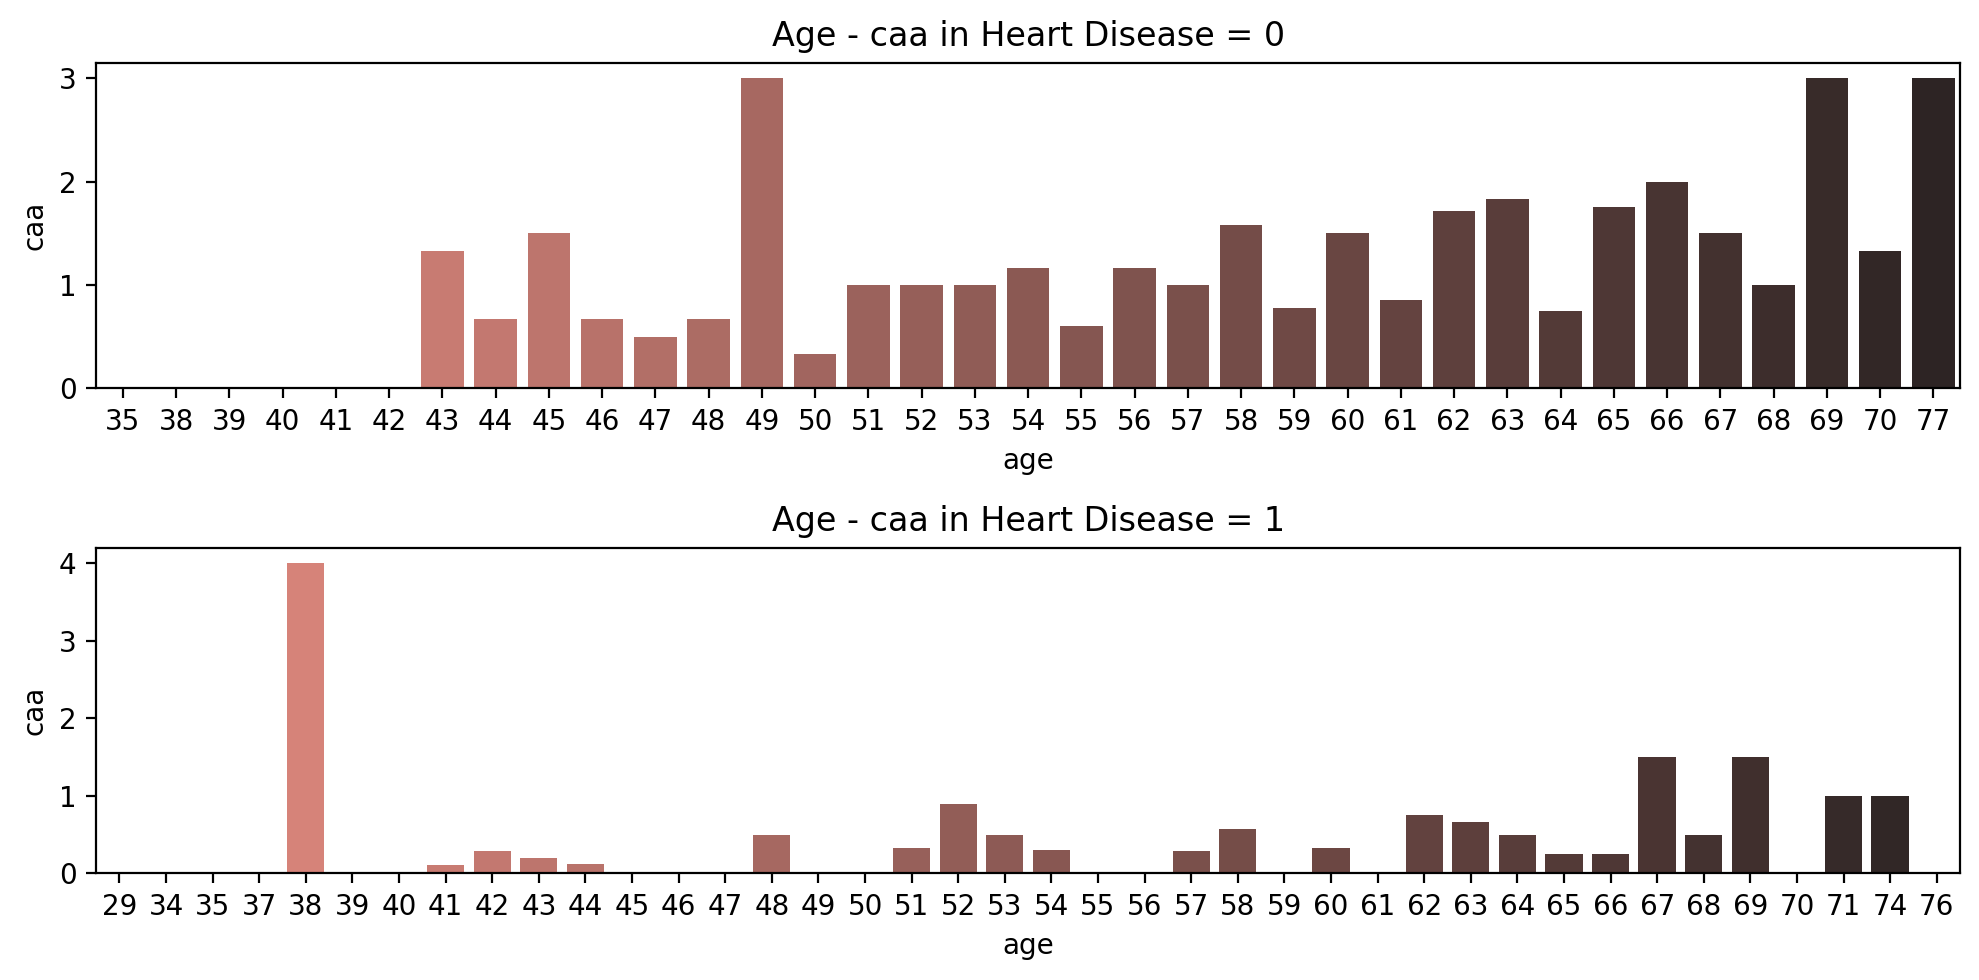

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - caa in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - caa in Heart Disease = 1')


plt.tight_layout()

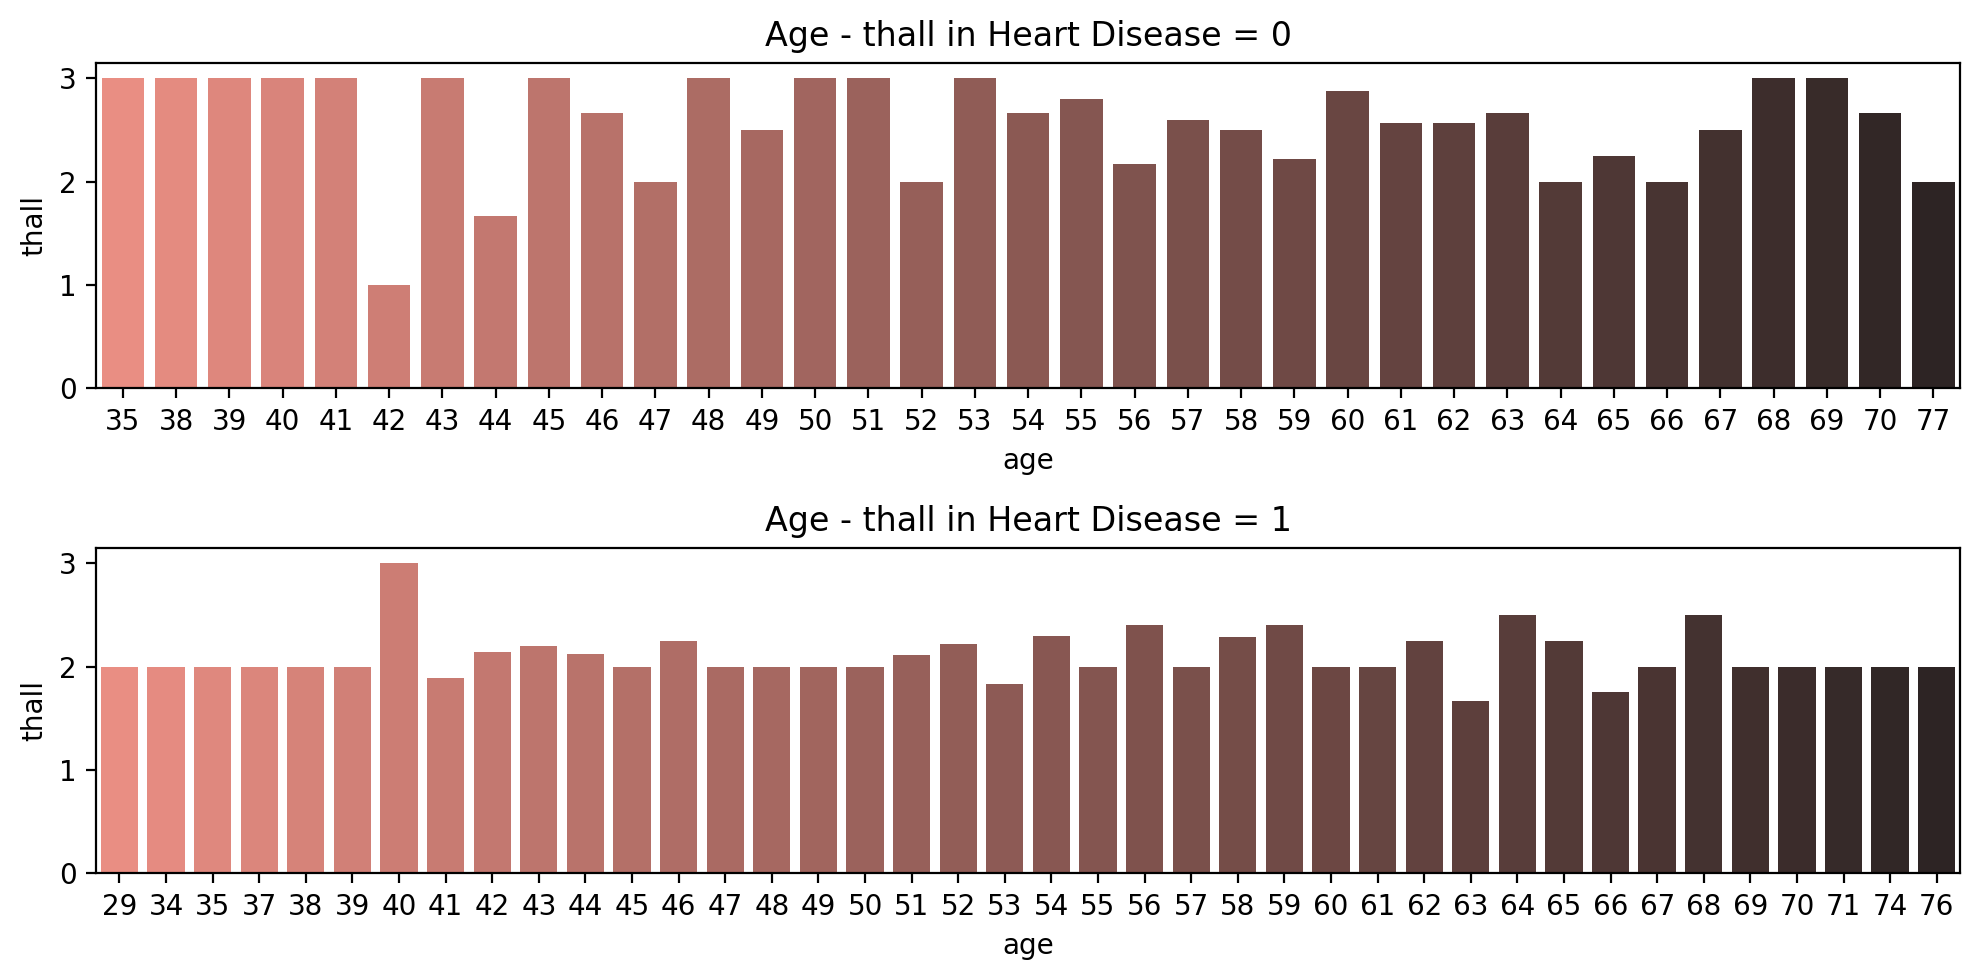

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - thall in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - thall in Heart Disease = 1')


plt.tight_layout()


  - In this part of the visualization, We use a "scatter plot" versus a "line plot" to compare people who have heart disease and people who don't.
    Of course we can see how the rate of change is affected by age.
    



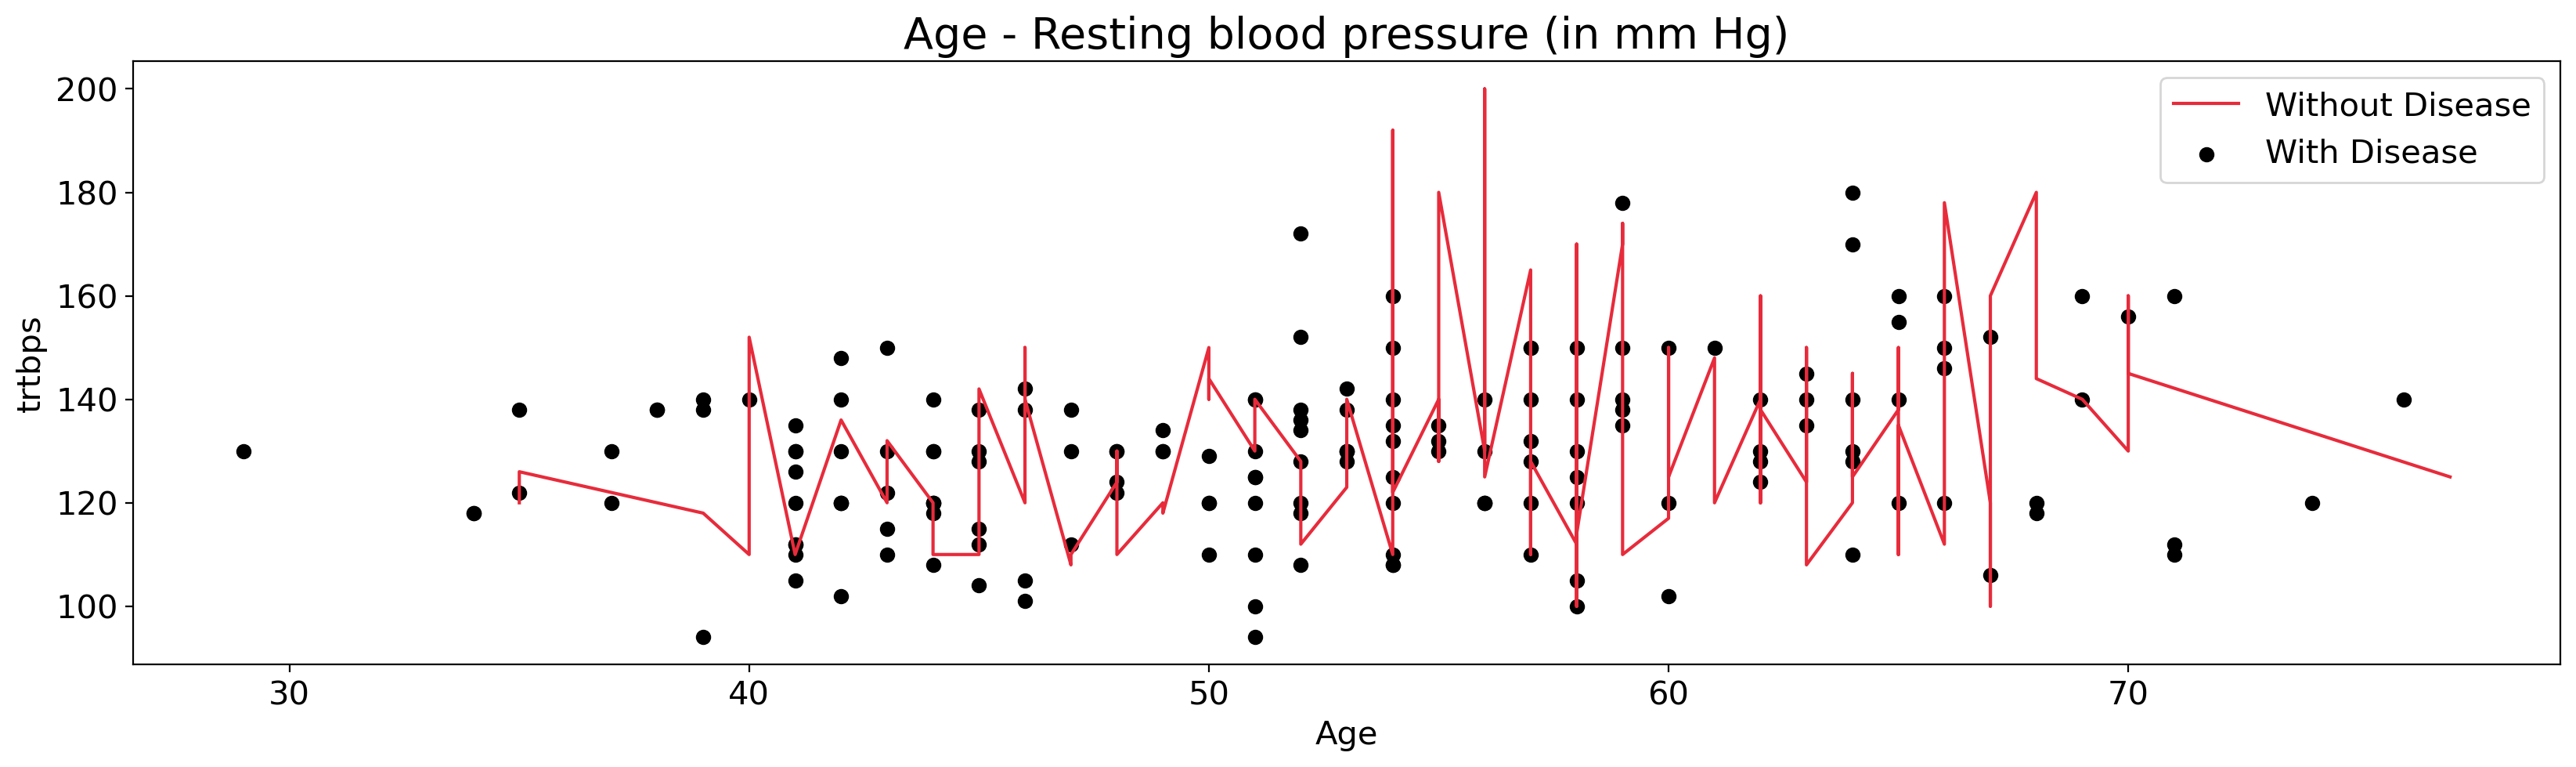

In [19]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['trtbps'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['trtbps'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Resting blood pressure (in mm Hg)", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("trtbps", fontsize=15)


plt.show()

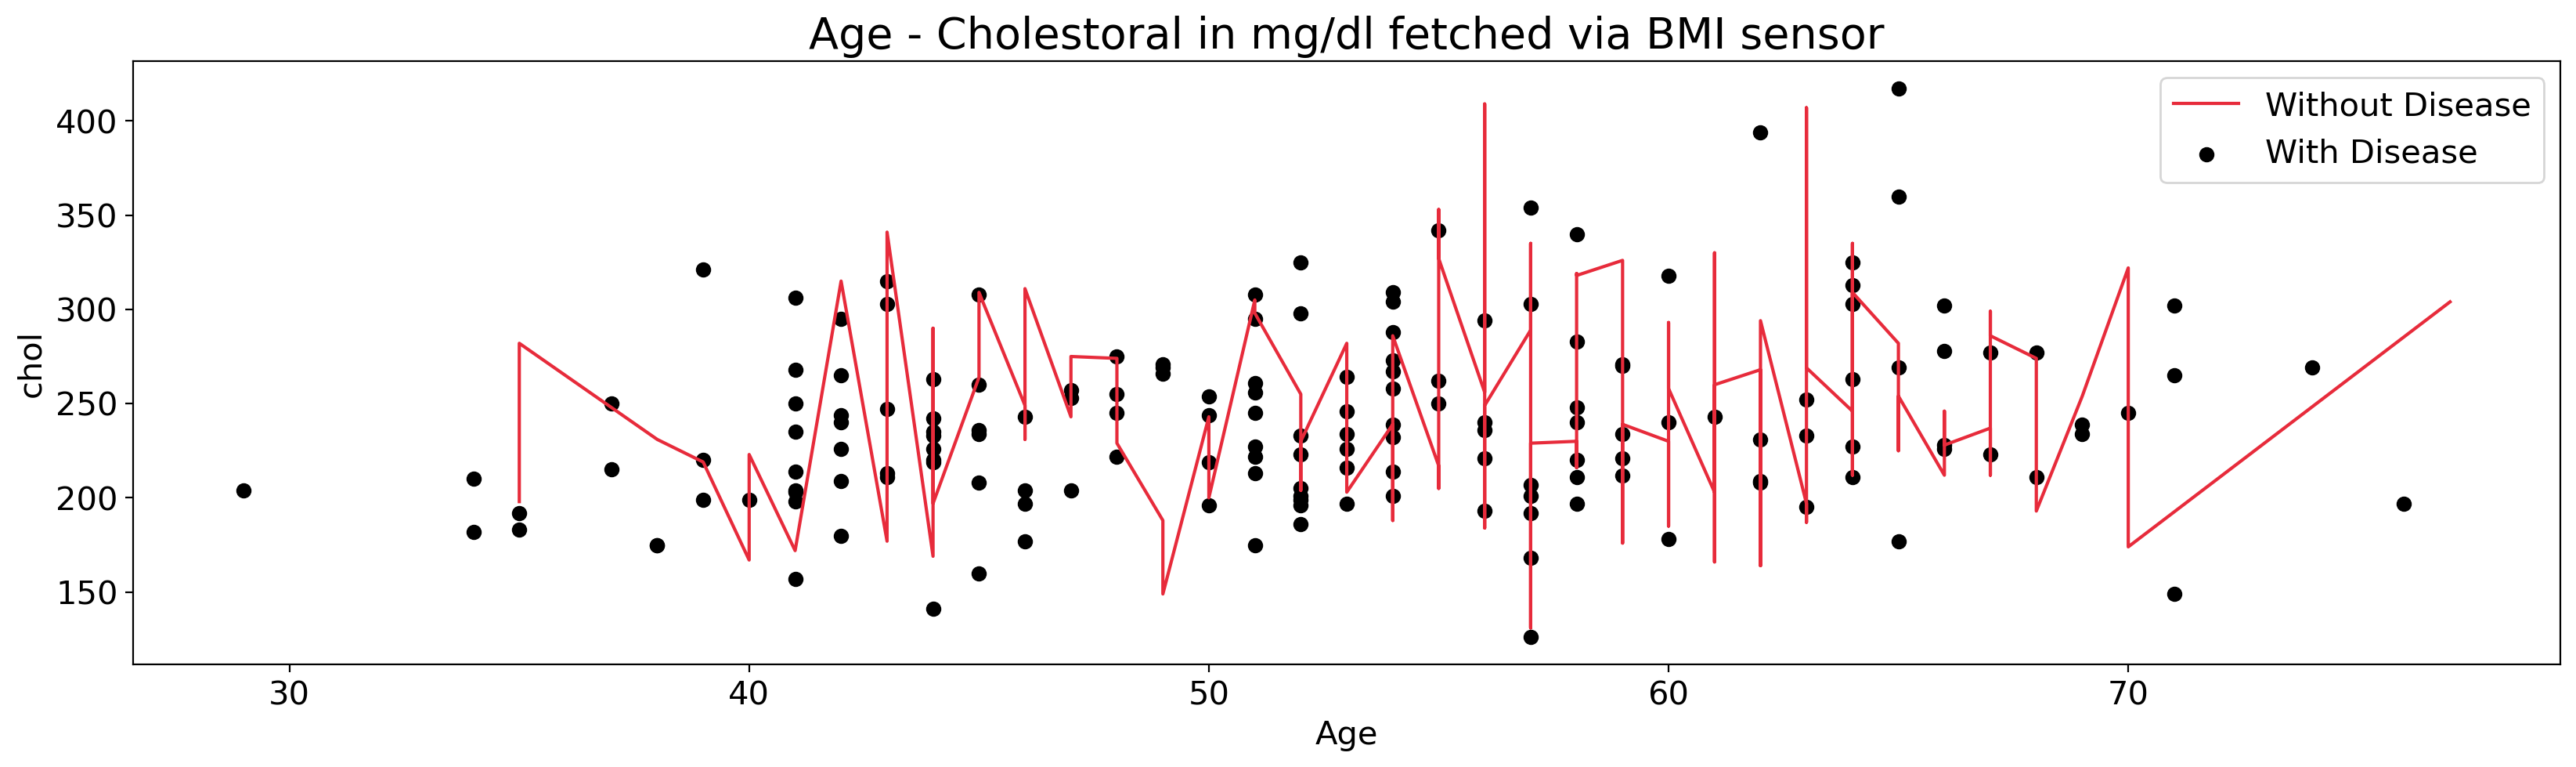

In [20]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['chol'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['chol'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Cholestoral in mg/dl fetched via BMI sensor", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("chol", fontsize=15)


plt.show()

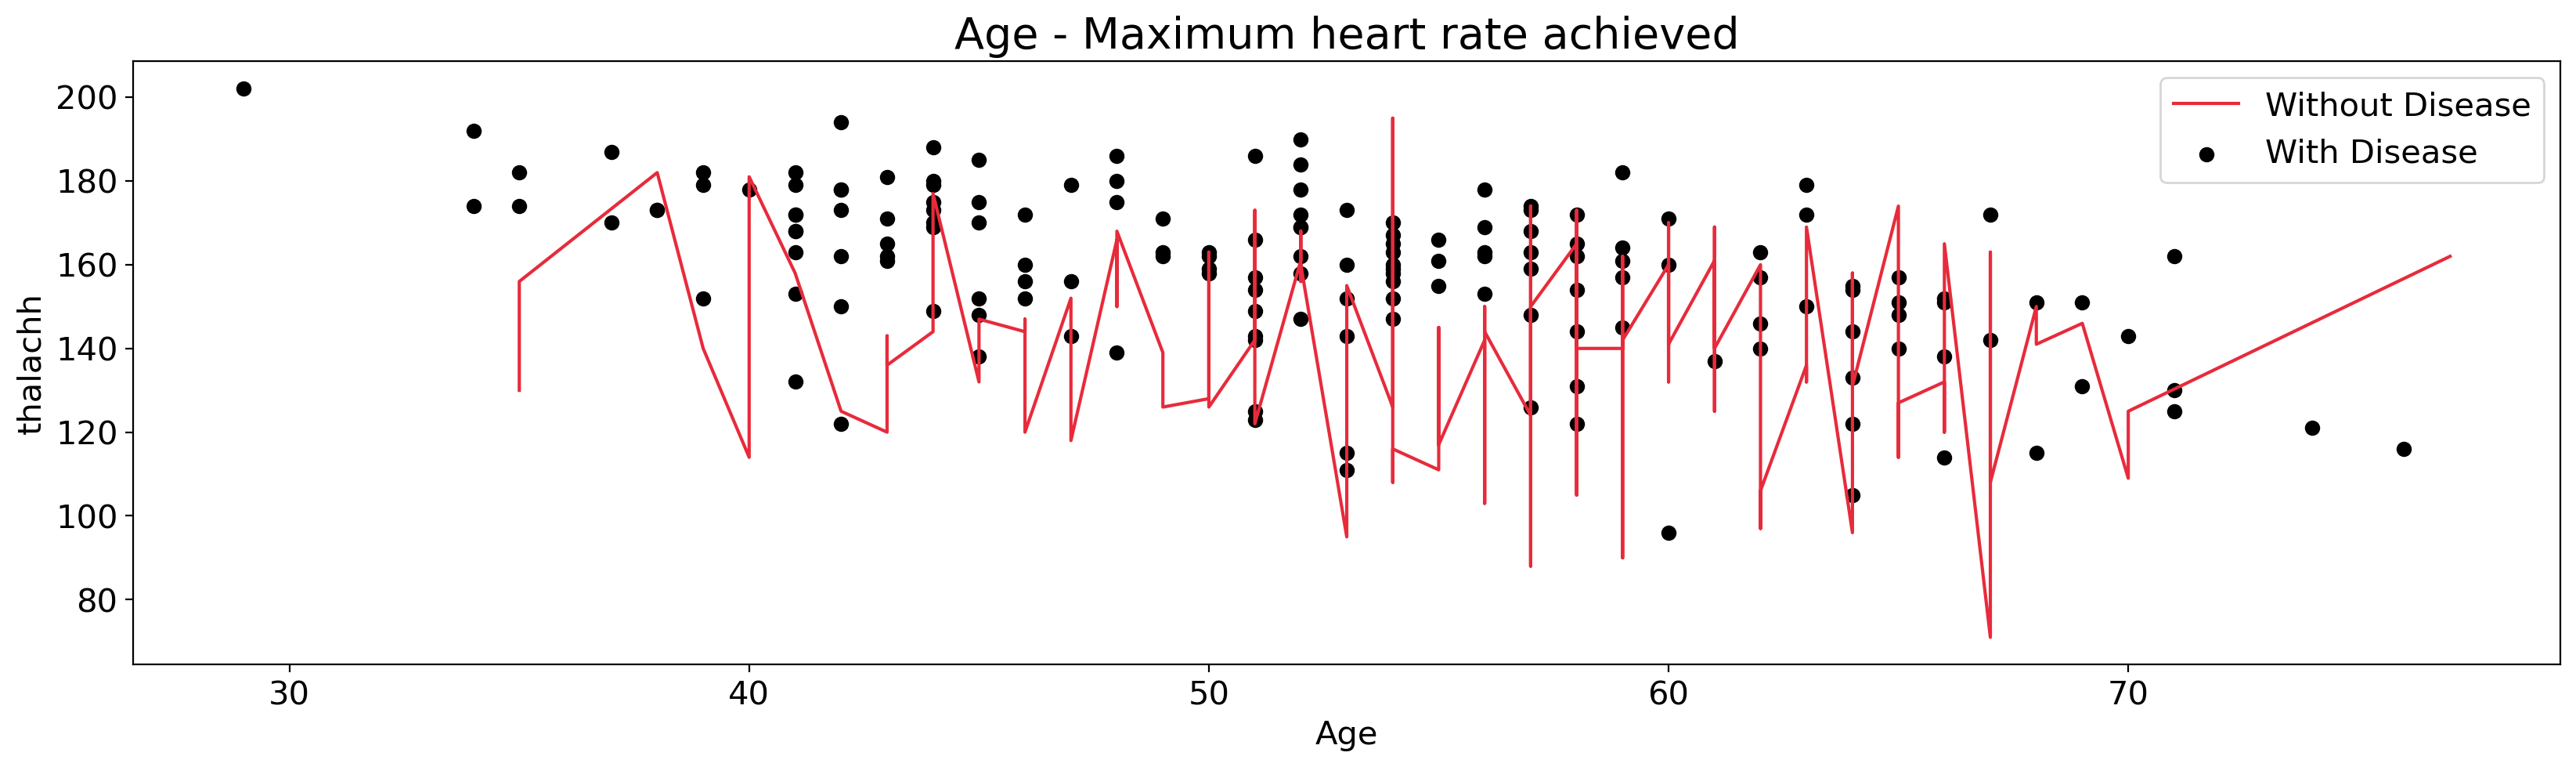

In [21]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['thalachh'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['thalachh'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Maximum heart rate achieved", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("thalachh", fontsize=15)


plt.show()

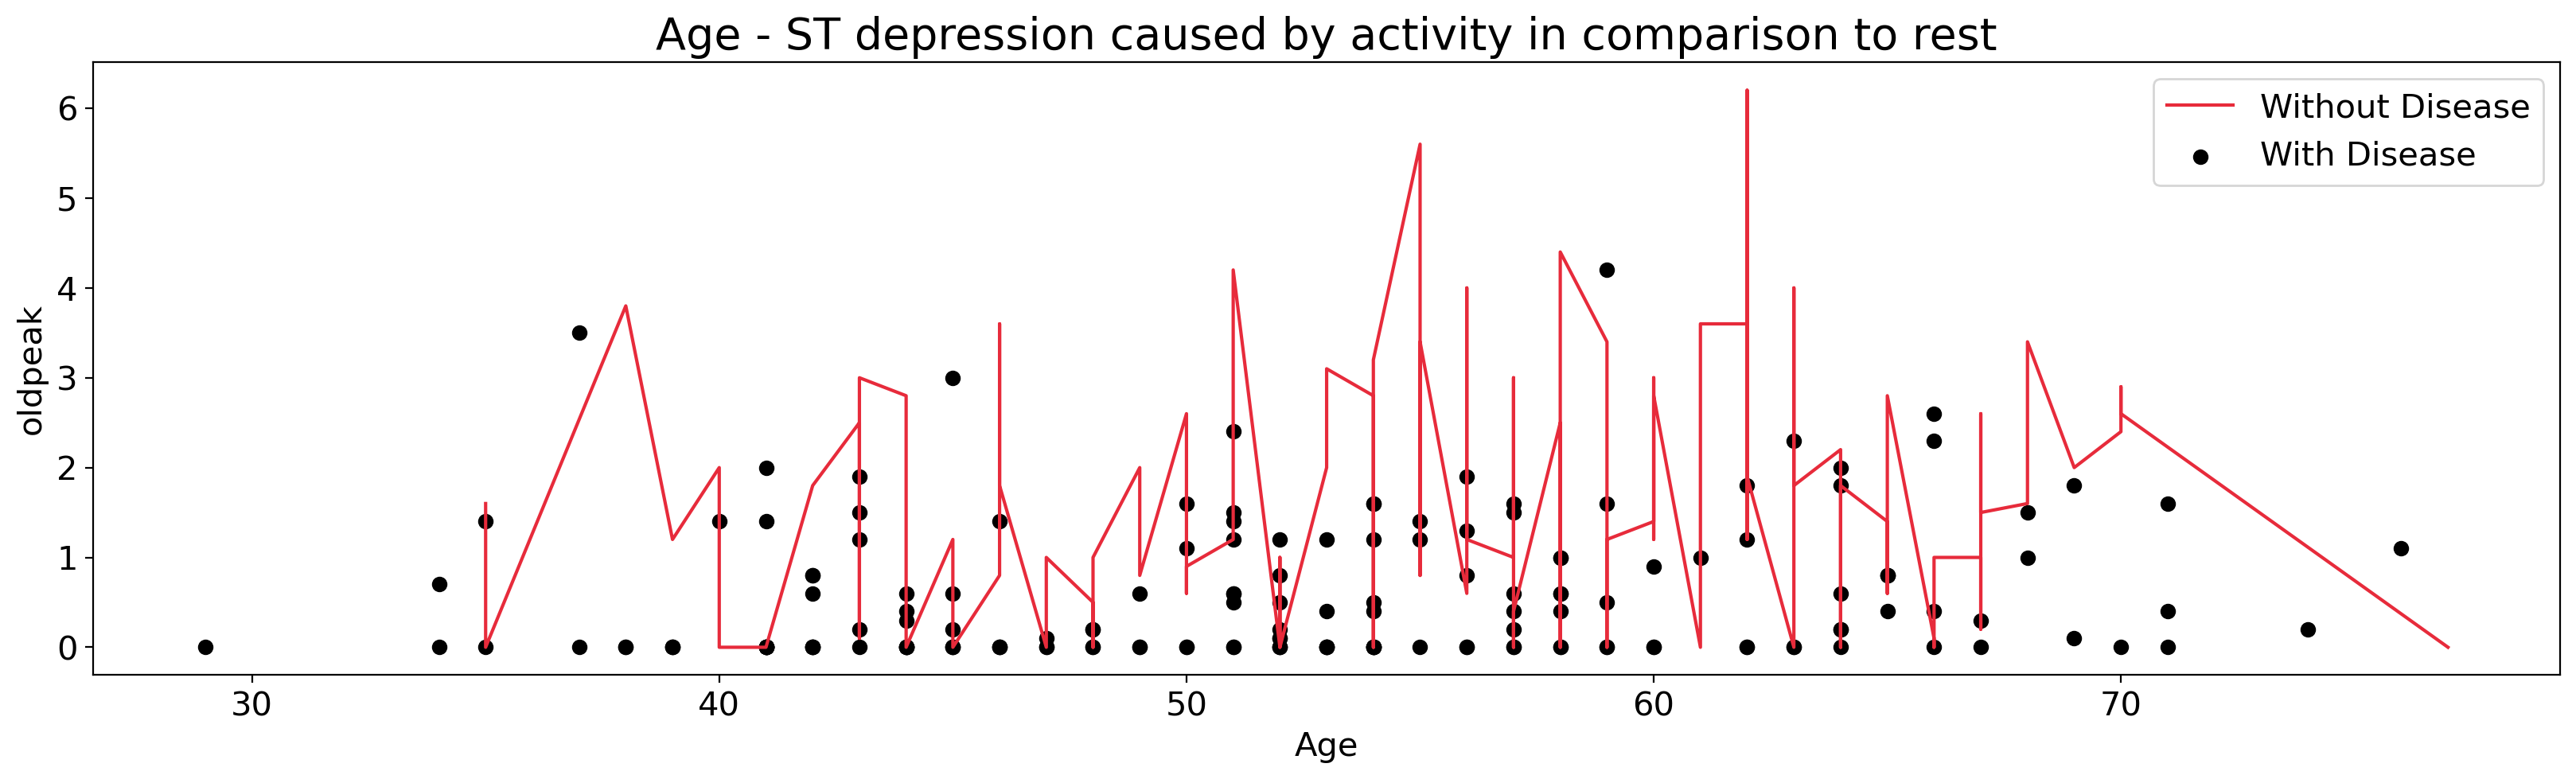

In [22]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['oldpeak'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['oldpeak'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - ST depression caused by activity in comparison to rest", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("oldpeak", fontsize=15)


plt.show()

**Normalize:**

  - Before starting the machine learning part, we must normalize the entire dataset (except target, but in this case, the target is binary and it's ok).
    



In [23]:
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)

In [24]:
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

desc_norm_df = describe(Norm_df)
desc_norm_df

,variable,dtype,count,unique,missing value,Min,Max
0,age,float64,302,41,0,0.0,1.0
1,sex,float64,302,2,0,0.0,1.0
2,cp,float64,302,4,0,0.0,1.0
3,trtbps,float64,302,49,0,0.0,1.0
4,chol,float64,302,151,0,0.0,1.0
5,fbs,float64,302,2,0,0.0,1.0
6,restecg,float64,302,3,0,0.0,1.0
7,thalachh,float64,302,91,0,0.0,1.0
8,exng,float64,302,2,0,0.0,1.0
9,oldpeak,float64,302,40,0,0.0,1.0


In [25]:
Norm_df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.367698,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.426117,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.268041,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.378007,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.783505,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667
5,0.583333,1.0,0.000000,0.433962,0.226804,0.0,0.5,0.587786,0.0,0.064516,0.5,0.0,0.333333
6,0.562500,0.0,0.333333,0.433962,0.577320,0.0,0.0,0.625954,0.0,0.209677,0.5,0.0,0.666667
7,0.312500,1.0,0.333333,0.245283,0.470790,0.0,0.5,0.778626,0.0,0.000000,1.0,0.0,1.000000
8,0.479167,1.0,0.666667,0.735849,0.250859,1.0,0.5,0.694656,0.0,0.080645,1.0,0.0,1.000000
9,0.583333,1.0,0.666667,0.528302,0.144330,0.0,0.5,0.786260,0.0,0.258065,1.0,0.0,0.666667


In [26]:
X = Norm_df#This dataframe is created for features
y = Main_Dataset['output'].values.reshape(-1,1)

**Train Test Split**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

## Machine Learning Models

**KNN + tune hyperparameters**

  - The first algorithm is KNN. The strategy is simple. Create two empty lists for appending the accuracies of the model, then change some of the important hyperparameters. In knn, We consider the range of K and P as the hyperparameters for change. Then, We compare all of the results and scores and finally chose the best one.
    



**For p=1**

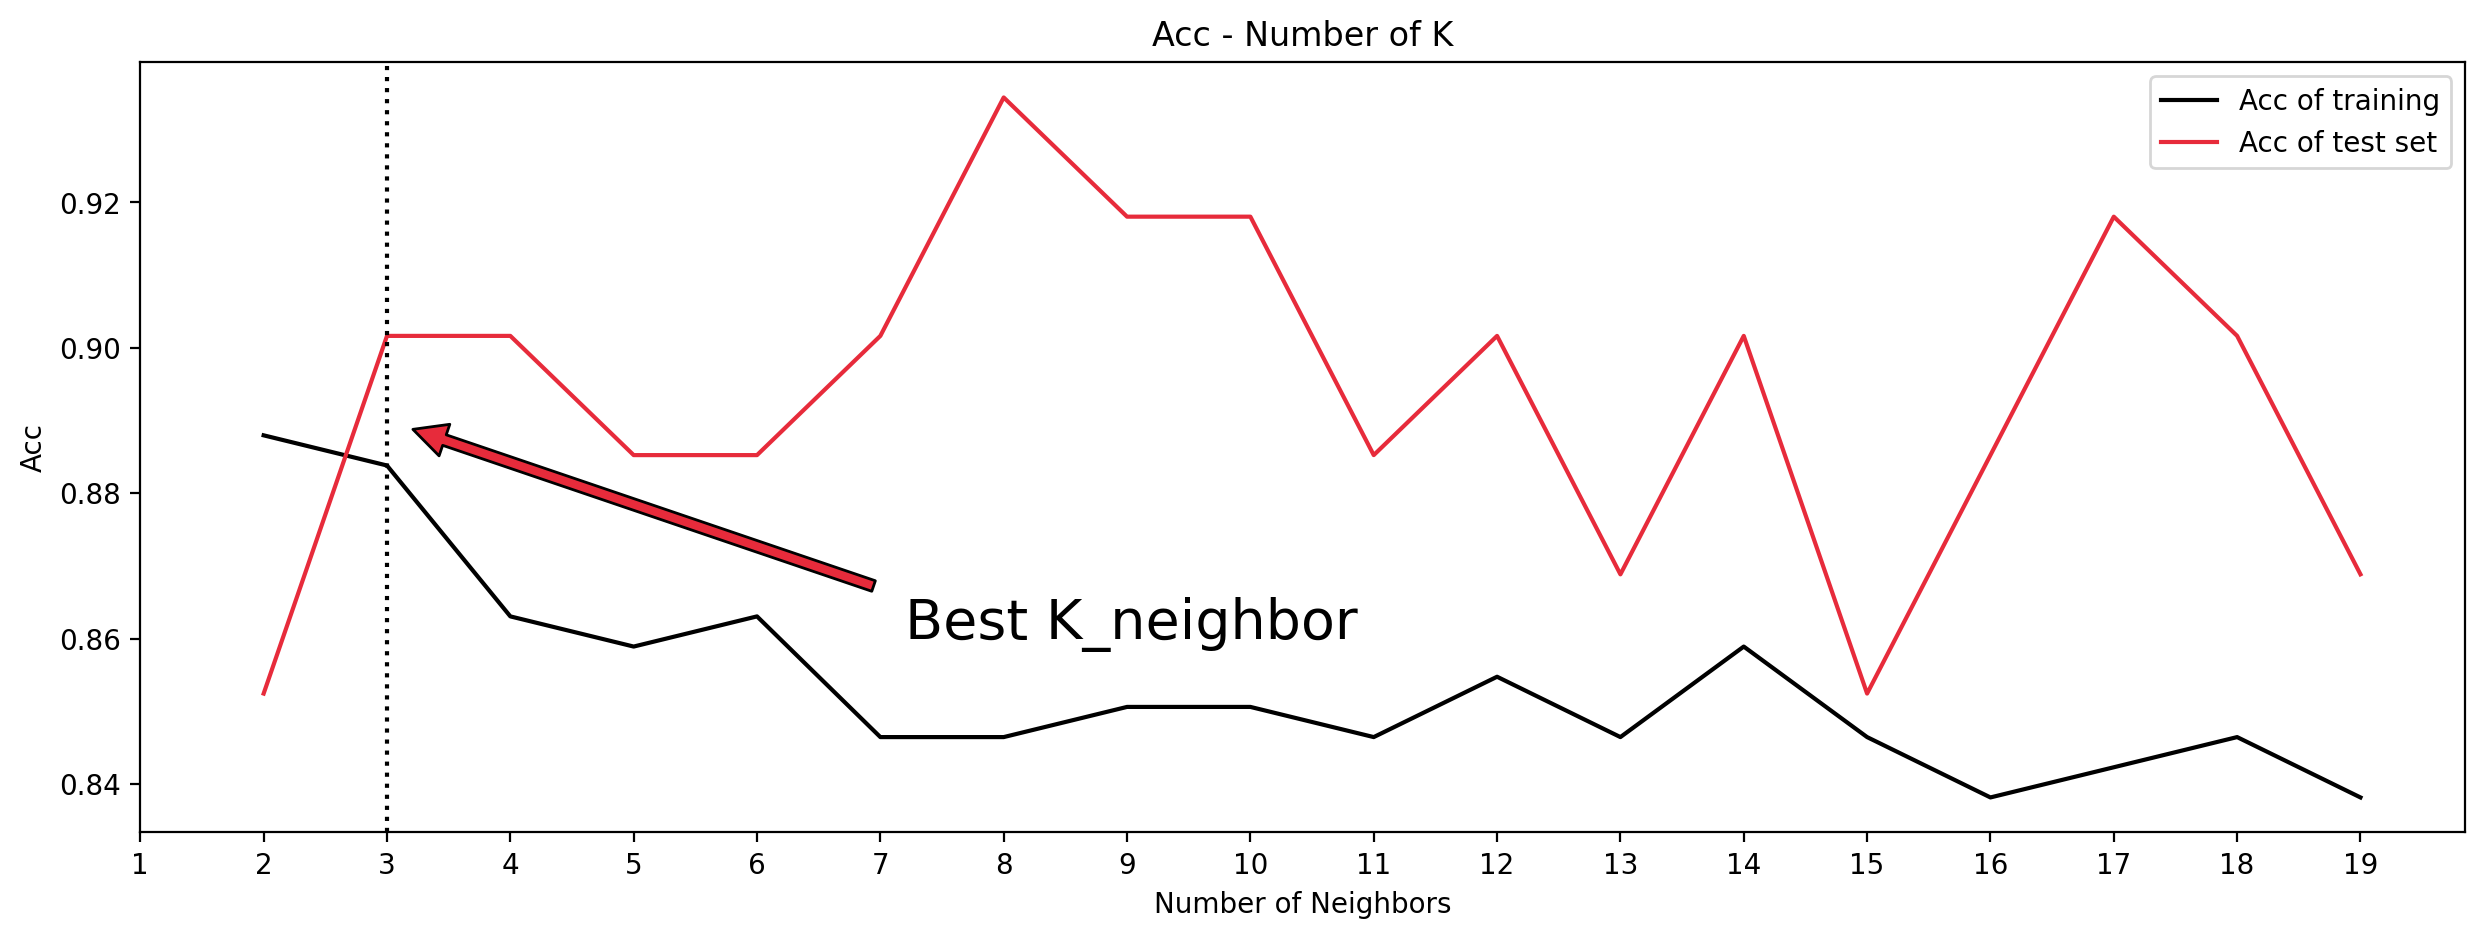

In [28]:
training_acc_1 = []
test_acc_1 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=1)
    knn.fit (X_train, y_train.ravel())
    training_acc_1.append(knn.score(X_train,y_train))
    test_acc_1.append(knn.score(X_test, y_test))
    

plt.figure(figsize=(15,5), dpi=200)    
plt.plot(range_k, training_acc_1, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_1, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best K_neighbor', xy=(3,0.89),xytext=(7.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

**k=3 and p=1**

In [29]:
K = 3
clf_1 = KNeighborsClassifier(K, p=1)
clf_1.fit(X_train, y_train.ravel())
y_pred_1 = clf_1.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_1))
Best_knn = metrics.accuracy_score(y_test,y_pred_1)

Accuracy 0.9016393442622951


**Confusion Matrix**

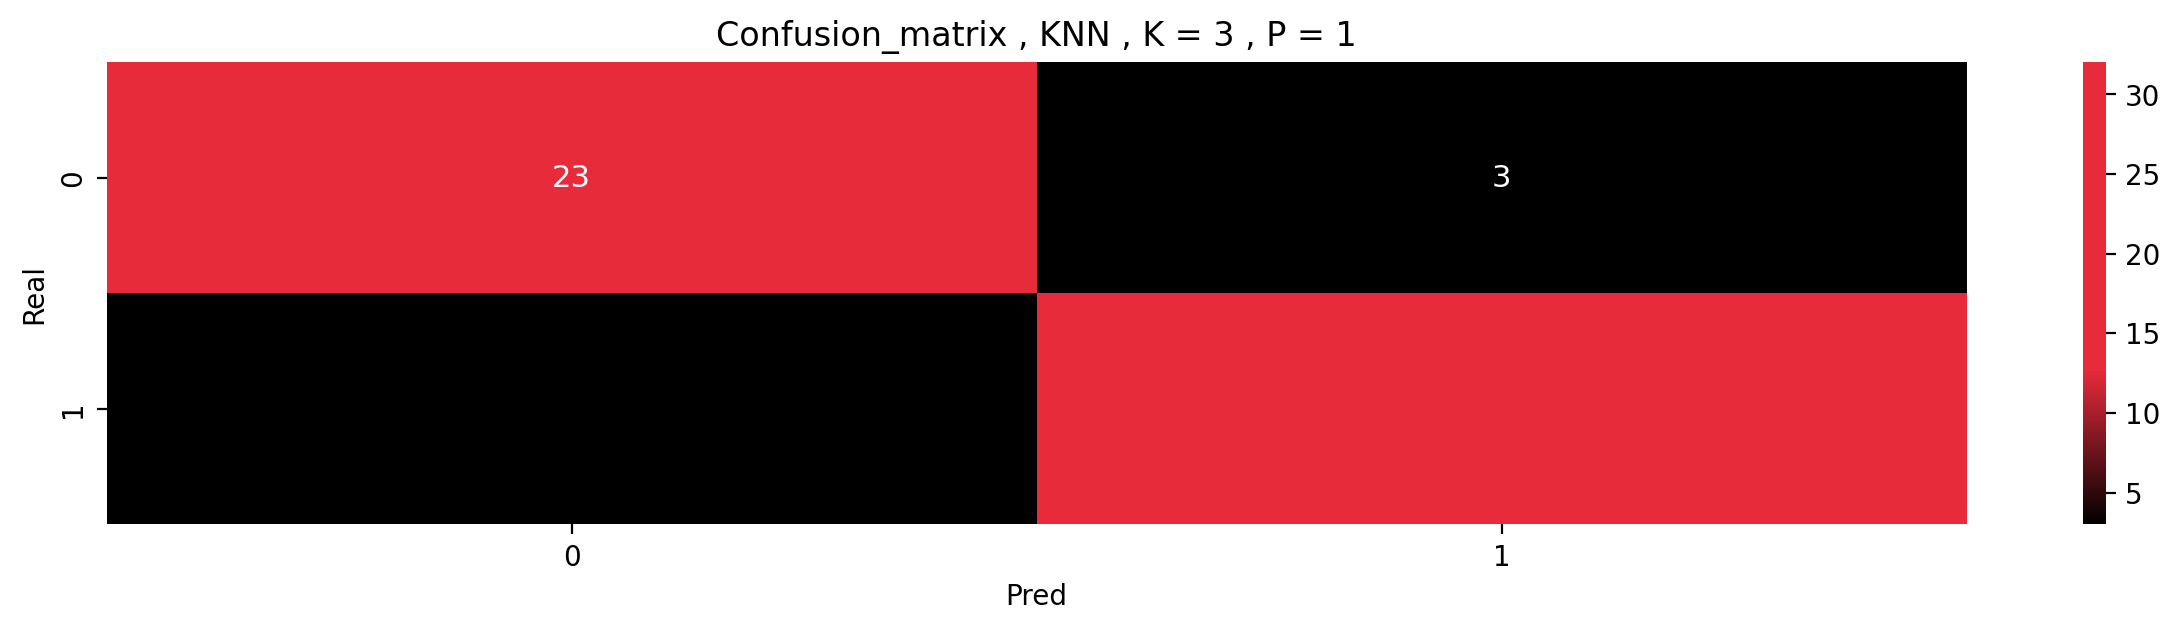

In [30]:
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**For p=2**

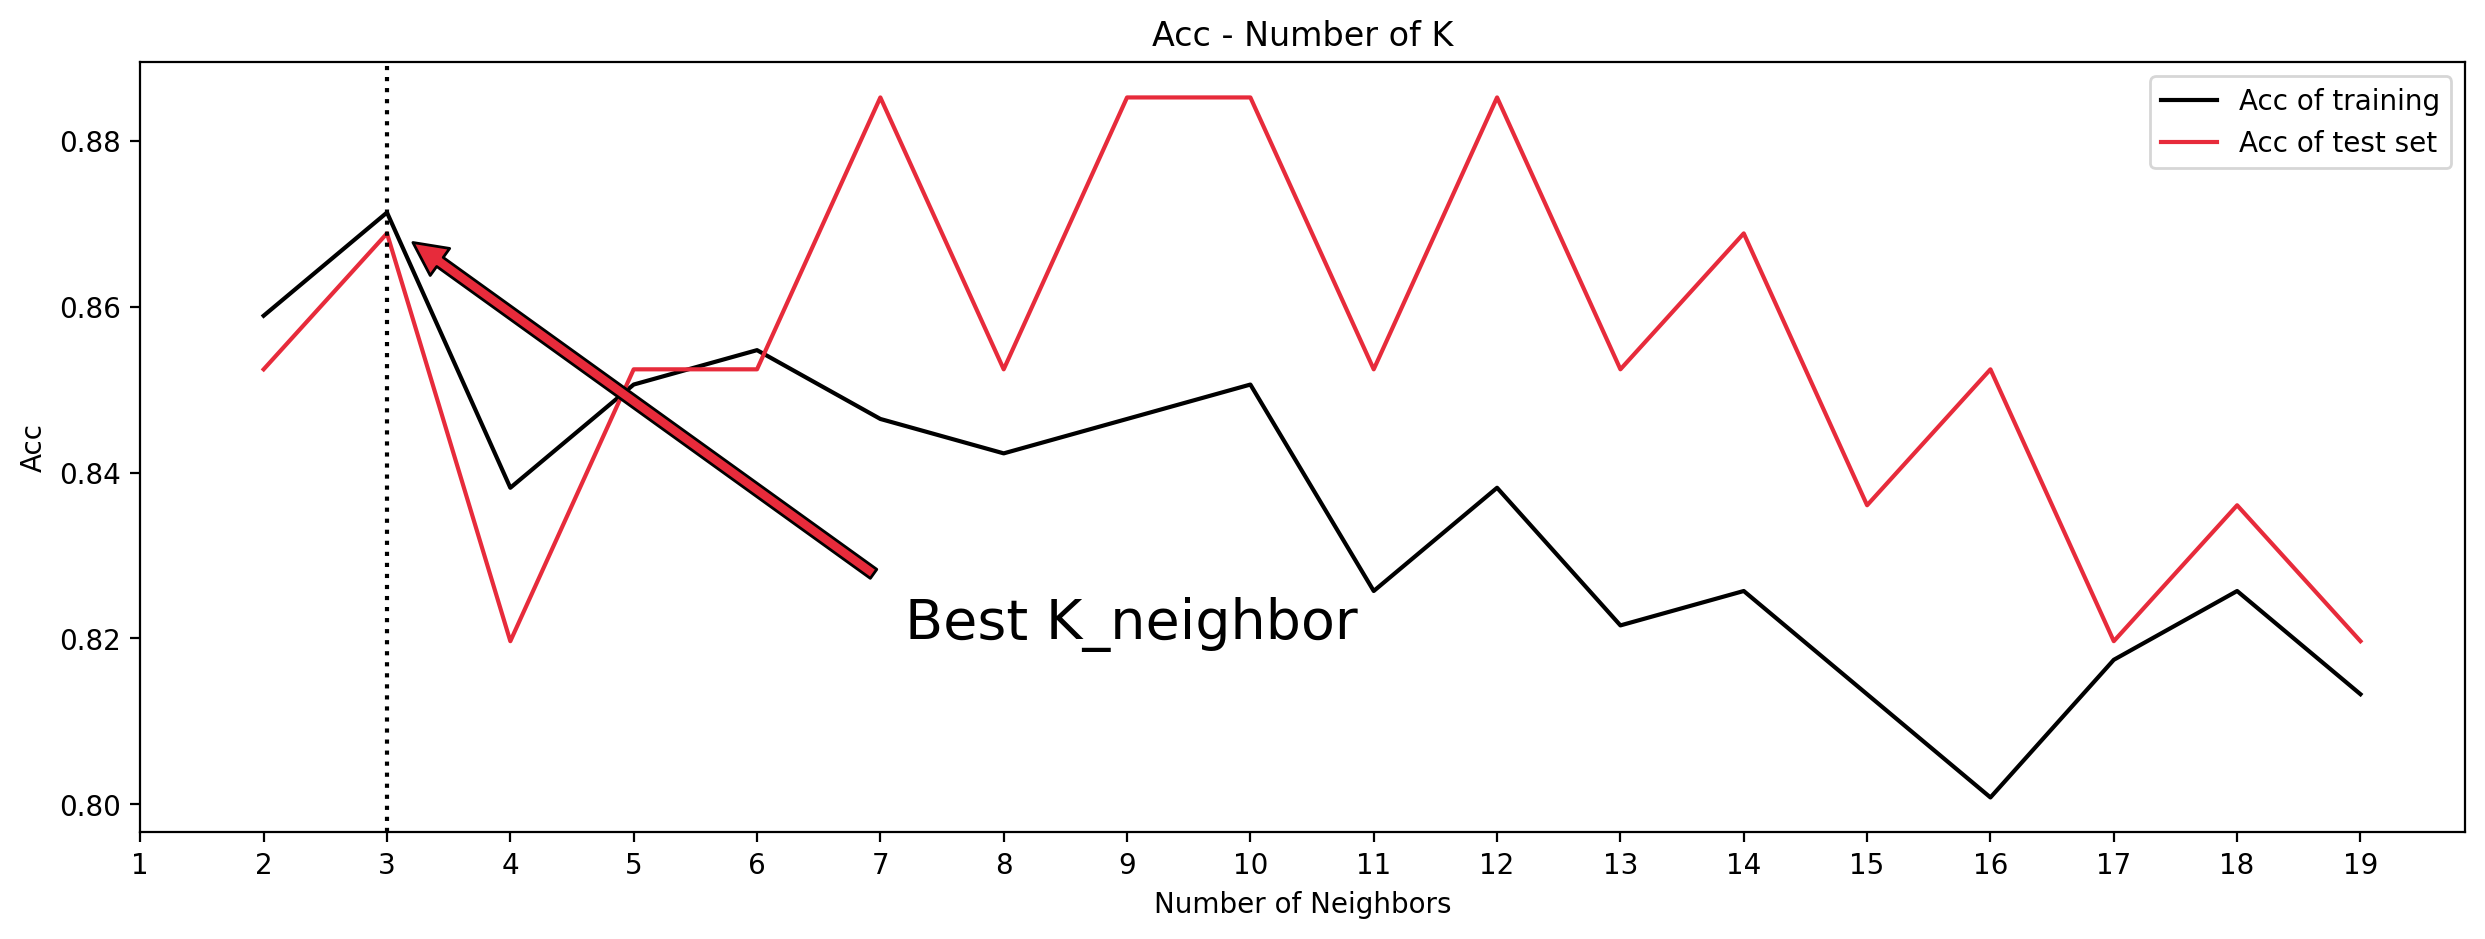

In [31]:
training_acc_2 = []
test_acc_2 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=2)
    knn.fit (X_train, y_train.ravel())
    training_acc_2.append(knn.score(X_train,y_train))
    test_acc_2.append(knn.score(X_test, y_test))
    

plt.figure(figsize=(15,5), dpi=200)    
plt.plot(range_k, training_acc_2, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_2, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best K_neighbor', xy=(3,0.87),xytext=(7.2,0.82), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

**k=3 and p=2**

In [32]:
K = 3
clf_2 = KNeighborsClassifier(K, p=2)
clf_2.fit(X_train, y_train.ravel())
y_pred_2 = clf_2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_2))

Accuracy 0.8688524590163934


**Confusion Matrix**

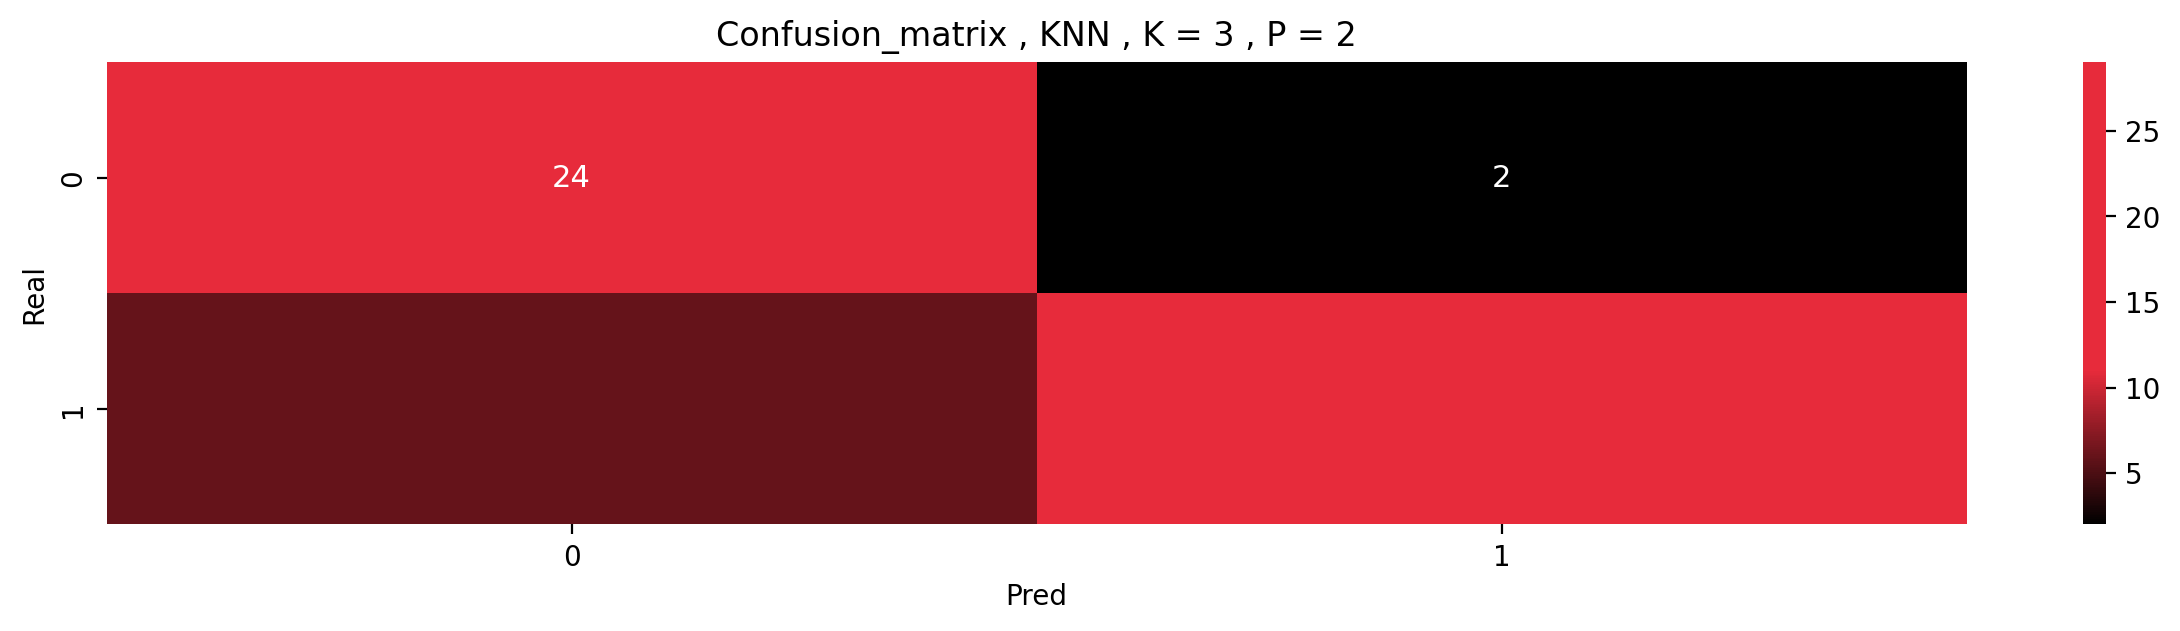

In [33]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 2")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                  [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**Classification Report**

In [34]:
print(classification_report(y_train, clf_1.predict(X_train)))
print(classification_report(y_train, clf_2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       112
           1       0.86      0.93      0.90       129

    accuracy                           0.88       241
   macro avg       0.89      0.88      0.88       241
weighted avg       0.89      0.88      0.88       241

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       112
           1       0.86      0.91      0.88       129

    accuracy                           0.87       241
   macro avg       0.87      0.87      0.87       241
weighted avg       0.87      0.87      0.87       241



**SVM + tune hyperparameters**

  - The second algorithm is SVM. In SVM, We consider the range of C "0.05 - 50" and Kernles "Linear, Poly, RBF and sigmoid" as the hyperparameters for change. Then, We compare all of the results and scores and finally chose the best one.
    



**For kernel = linear**

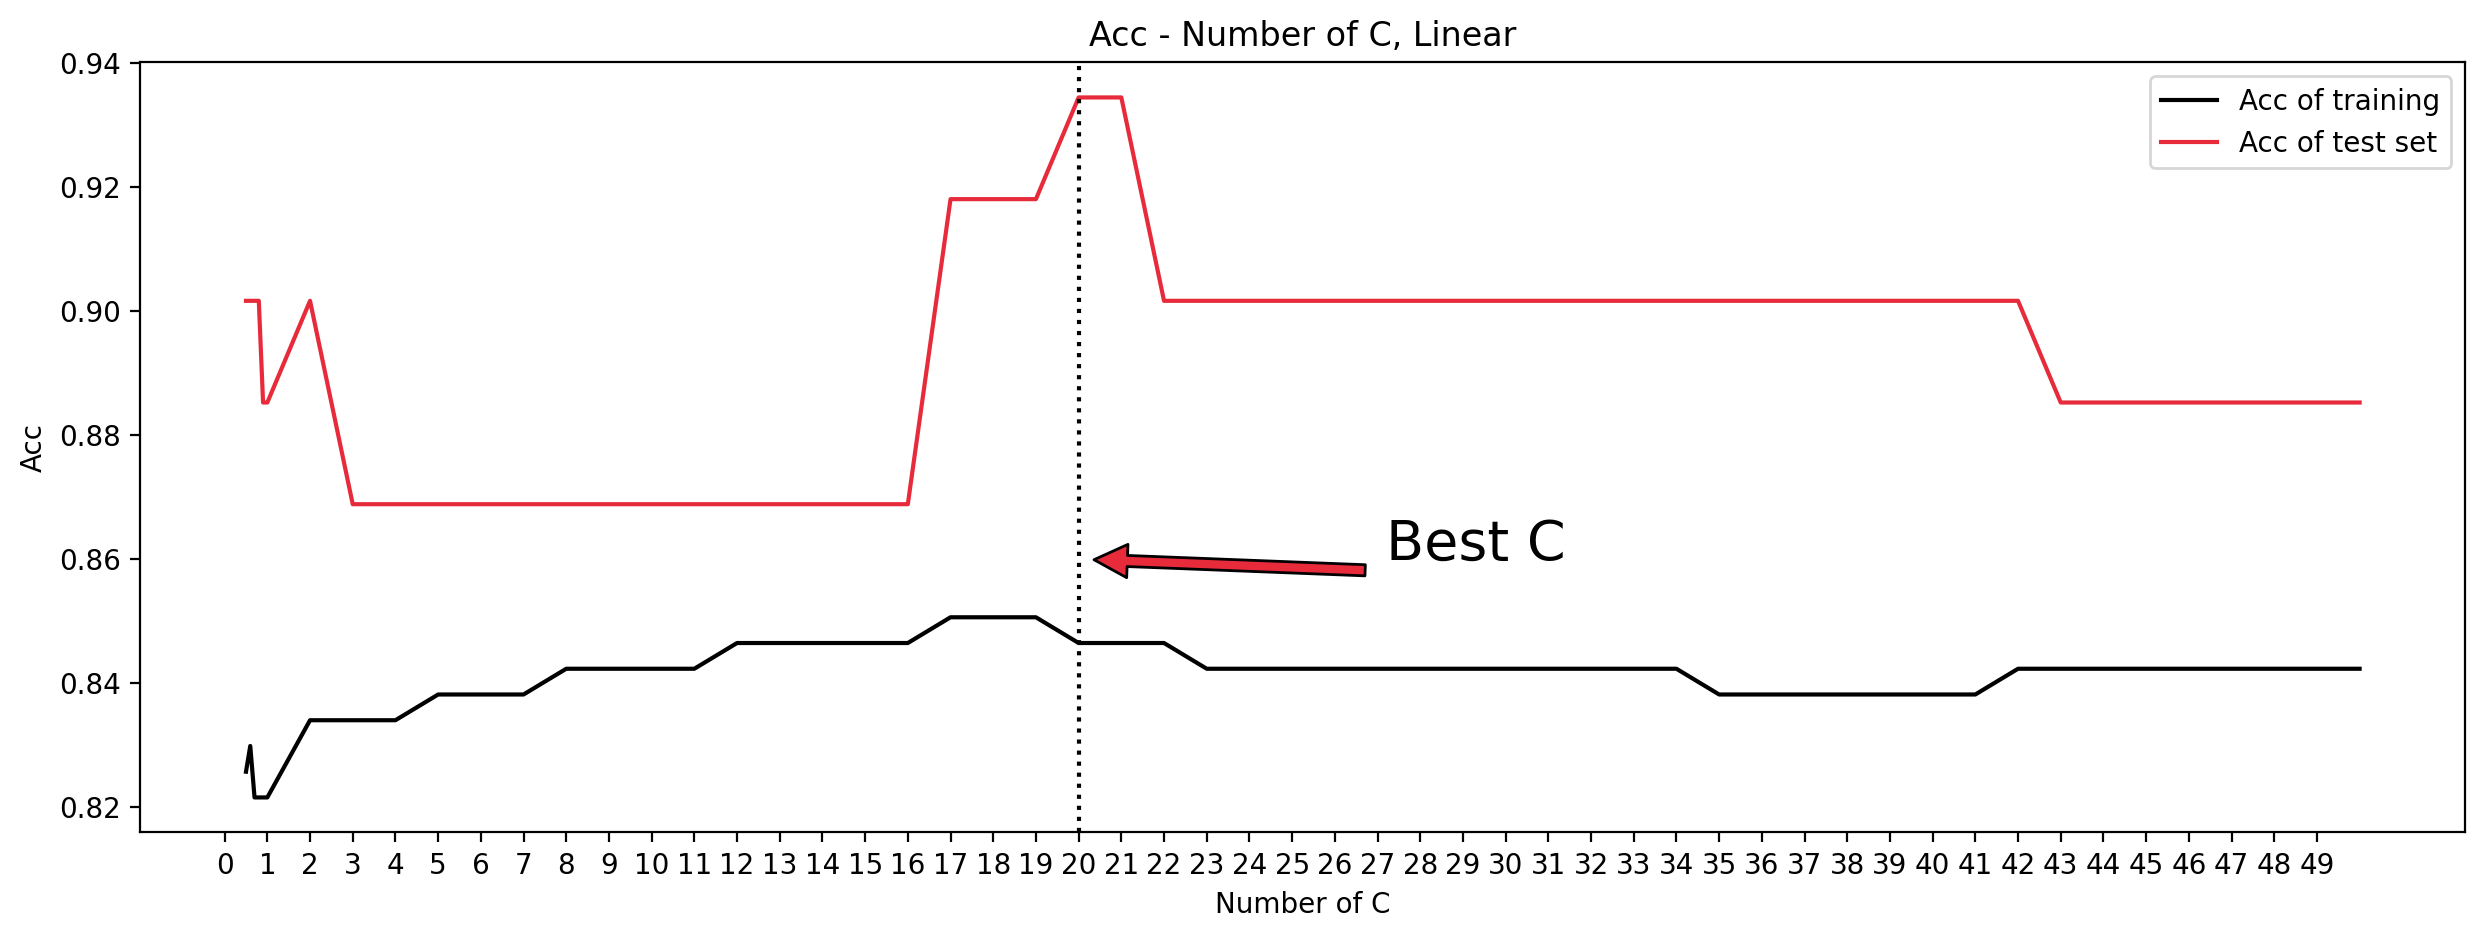

In [35]:
training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear','rbf'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(20,0.86),xytext=(27.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 20, linestyle= 'dotted', c= 'black')
plt.show()

**C=20 and kernel = linear**

In [36]:
clf_3 = SVC(C= 20, kernel= 'linear')
clf_3.fit(X_train, y_train.ravel())
y_pred_3 = clf_3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

Accuracy 0.9344262295081968


**Confusion Matrix**

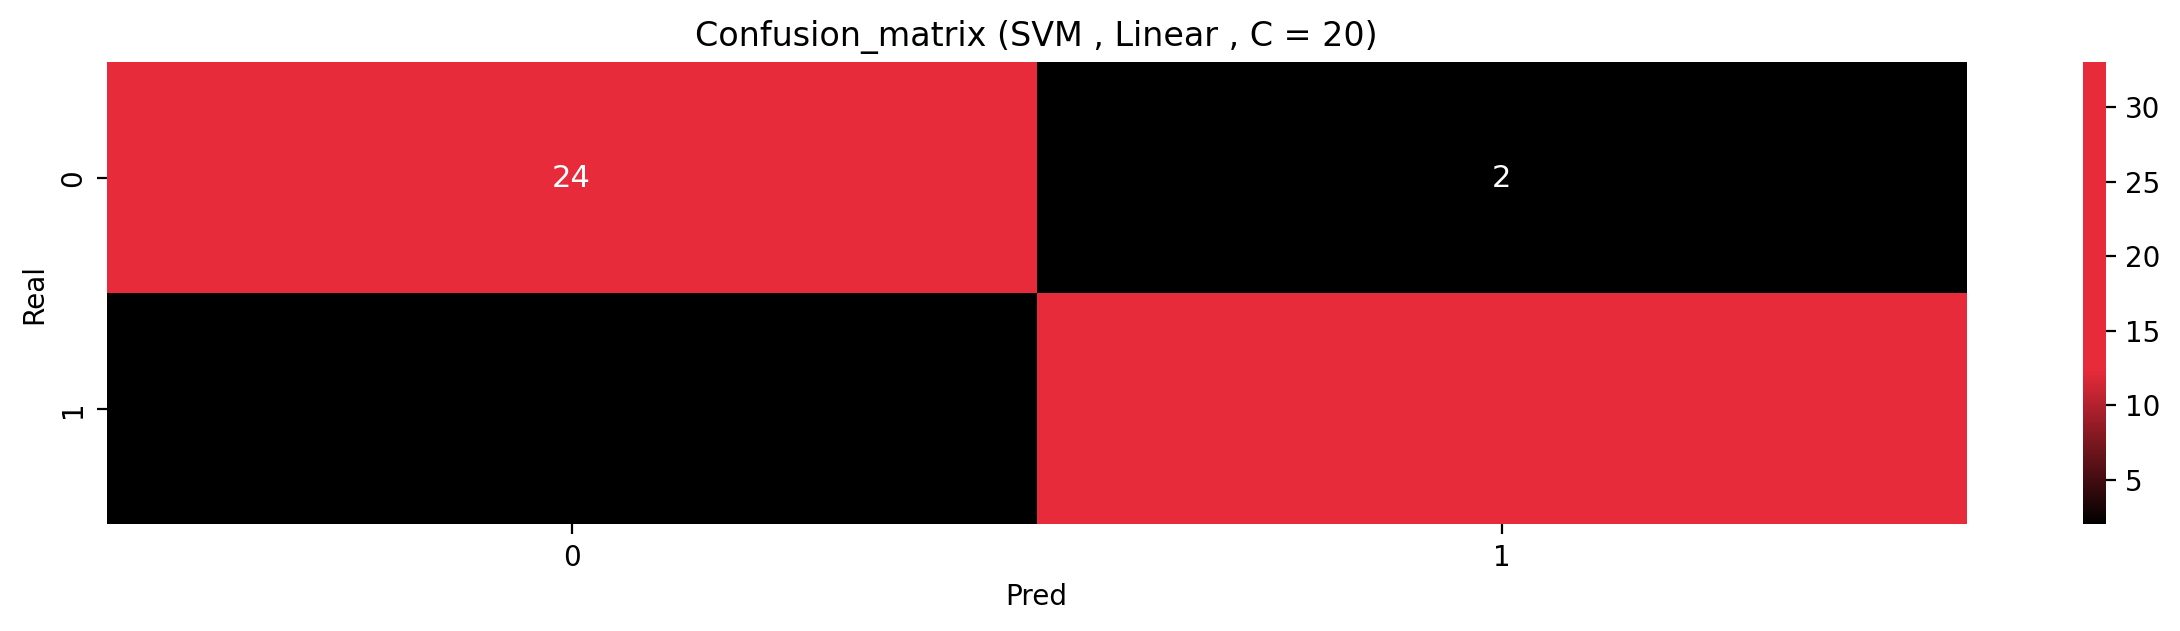

In [37]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 20)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**For kernel = rbf**

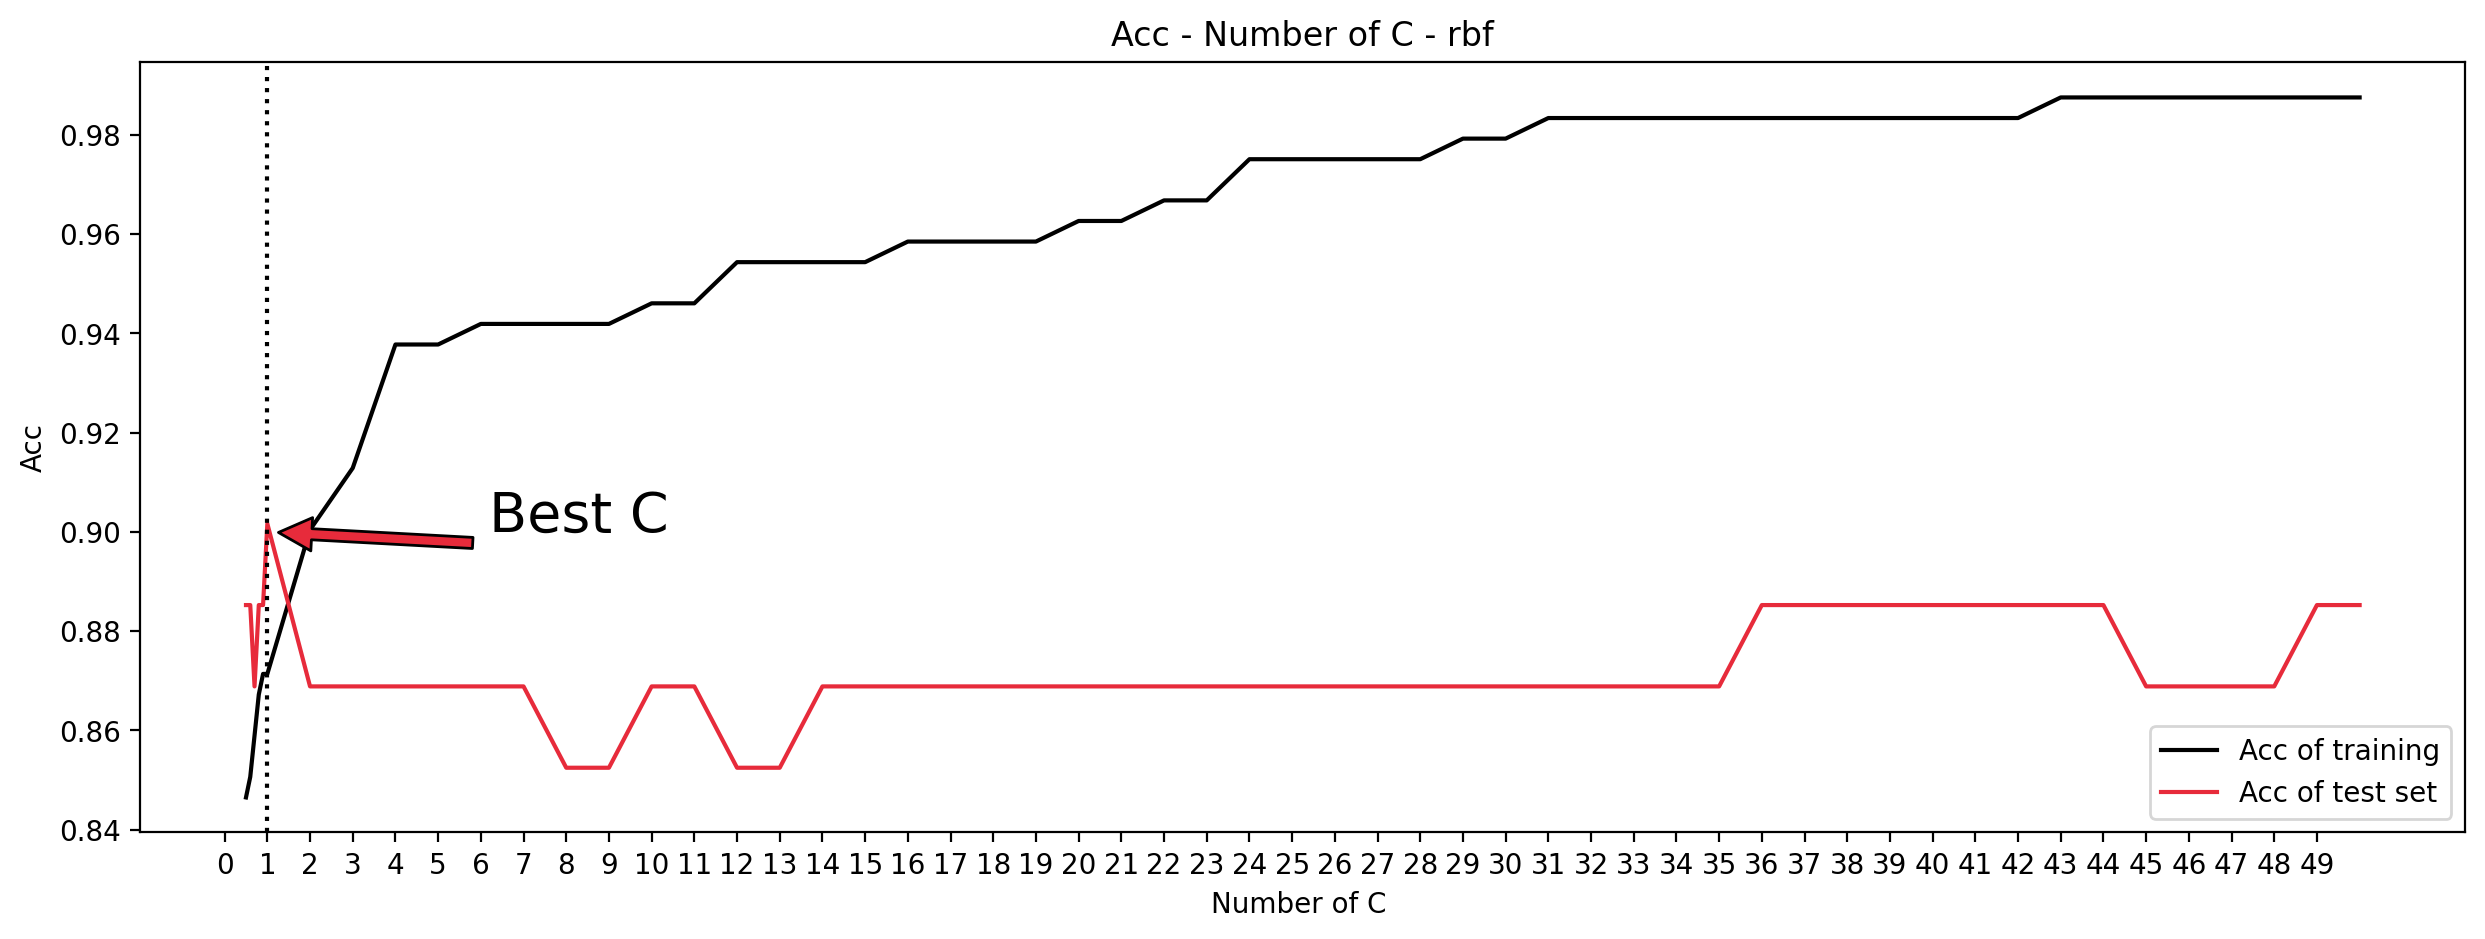

In [38]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear',rbf'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'rbf')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - rbf')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(1,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 1, linestyle= 'dotted', c= 'black')
plt.show()

**C=1 and kernel = rbf**

In [39]:
clf_4 = SVC(C= 1, kernel= 'rbf')
clf_4.fit(X_train, y_train.ravel())
y_pred_4 = clf_4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

Accuracy 0.9016393442622951


**Confusion Matrix**

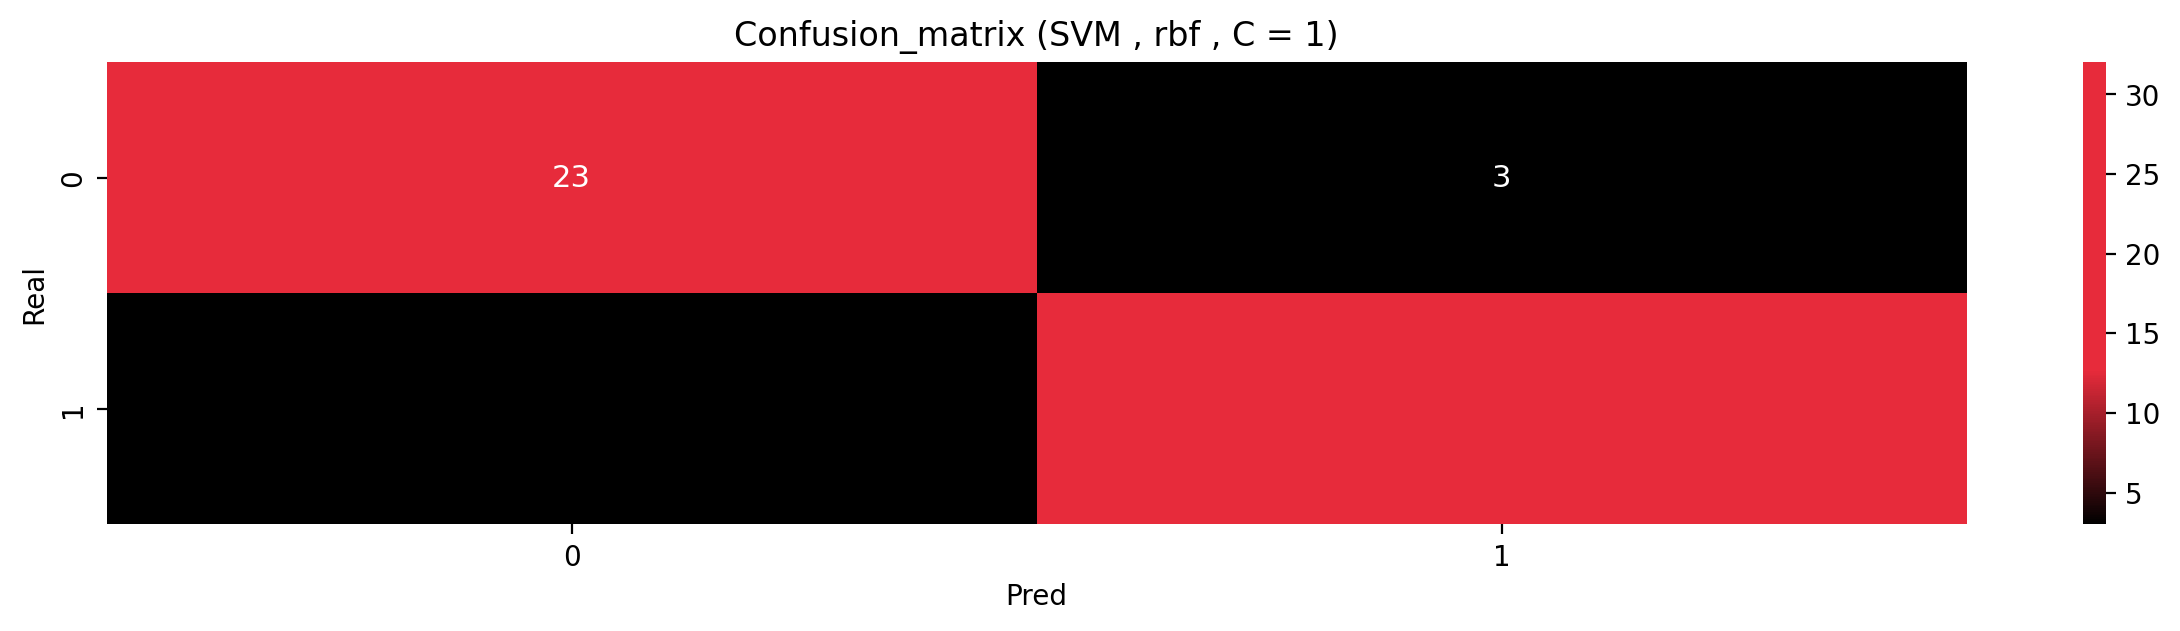

In [40]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , rbf , C = 1)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**Classsification Report**

In [41]:
print(classification_report(y_train, clf_3.predict(X_train)))
print(classification_report(y_train, clf_4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       112
           1       0.81      0.93      0.87       129

    accuracy                           0.85       241
   macro avg       0.86      0.84      0.84       241
weighted avg       0.85      0.85      0.84       241

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       112
           1       0.85      0.93      0.89       129

    accuracy                           0.87       241
   macro avg       0.88      0.87      0.87       241
weighted avg       0.87      0.87      0.87       241



**Decision Trees + tune hyperparameters**

  - The third algorithm is Decision trees. In DT, We consider the range of max depth "1 - 20" and Criterions "gini, entropy and log_loss" as the hyperparameters for change. Then, We compare all of the results and scores and finally chose the best one.
    



**For criterion = entroy**

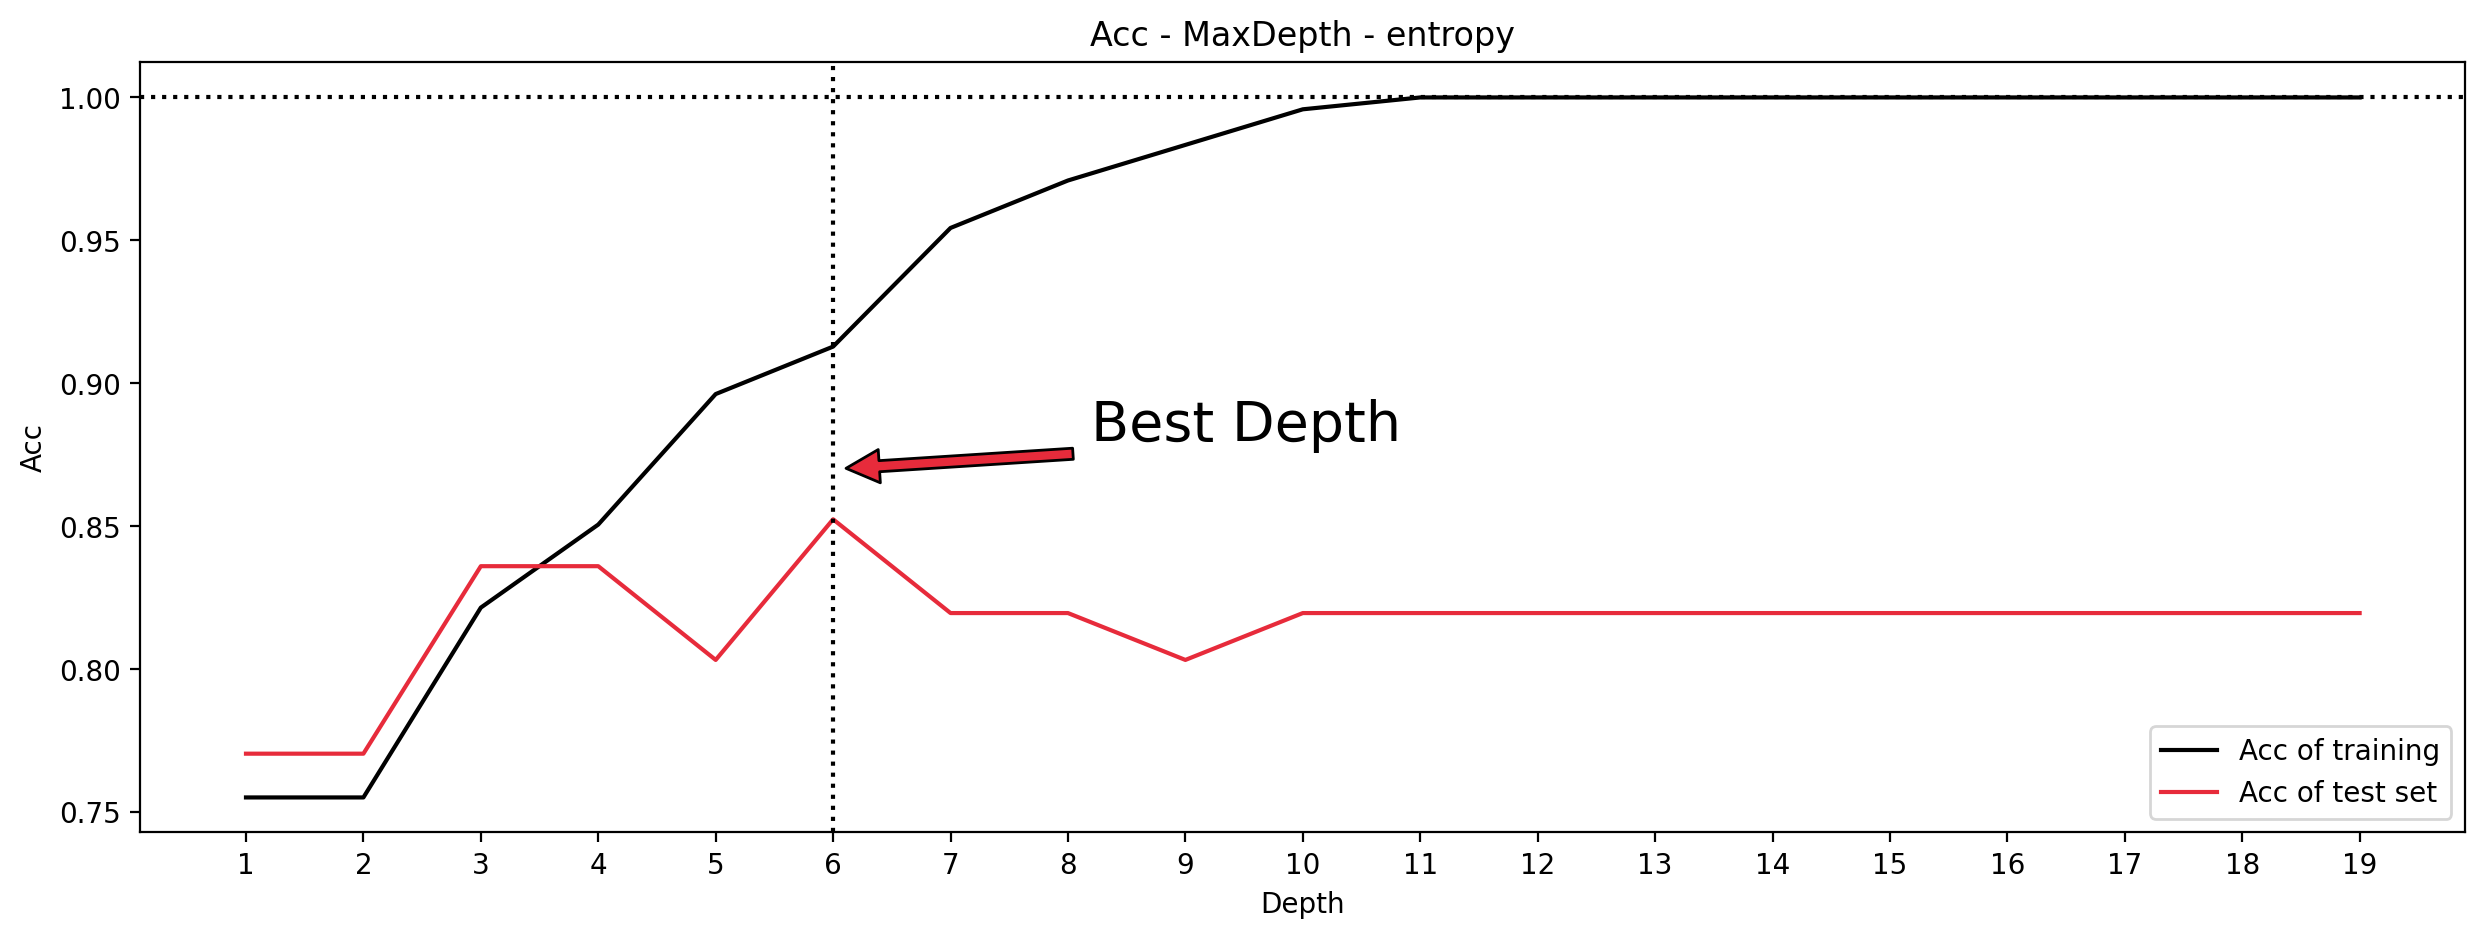

In [42]:
training_acc_5 = []
test_acc_5 = []

max_depth = range(1,20)

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'entropy', random_state=5)
    DT.fit (X_train, y_train.ravel())
    training_acc_5.append(DT.score(X_train,y_train))
    test_acc_5.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_5, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - entropy')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(6,0.87),xytext=(8.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =6, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

**max_depth = 6 and criterion = entropy**

In [43]:
clf_5 = DecisionTreeClassifier(max_depth = 6, criterion= 'entropy', random_state=5)
clf_5.fit(X_train, y_train.ravel())
y_pred_5 = clf_5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))
Best_DT = metrics.accuracy_score(y_test,y_pred_5)

Accuracy 0.8524590163934426


**Confusion Matrix**

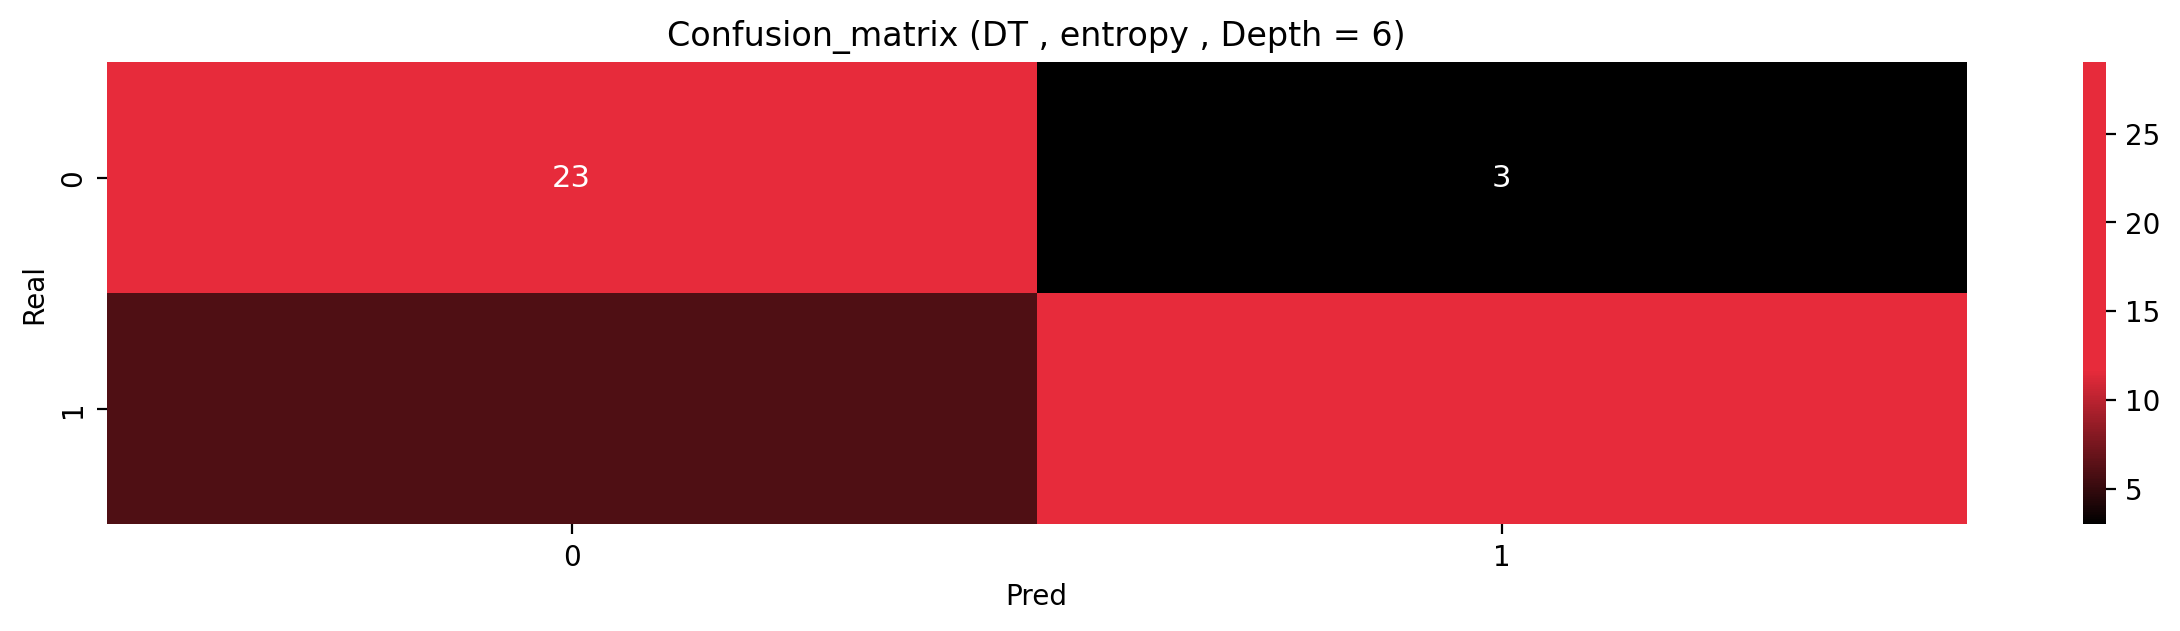

In [44]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , entropy , Depth = 6)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**Classification Report**

In [45]:
print(classification_report(y_train, clf_5.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       112
           1       0.90      0.95      0.92       129

    accuracy                           0.91       241
   macro avg       0.92      0.91      0.91       241
weighted avg       0.91      0.91      0.91       241



**Random Forest + tune hyperparameters**

  - The fourth algorithm is Random Forest. In RF, We consider the range of number of estimators "10 - 100" and Criterions "gini and entropy" as the hyperparameters for change. Then, We compare all of the results and scores and finally chose the best one.
    



**For criterion = gini**

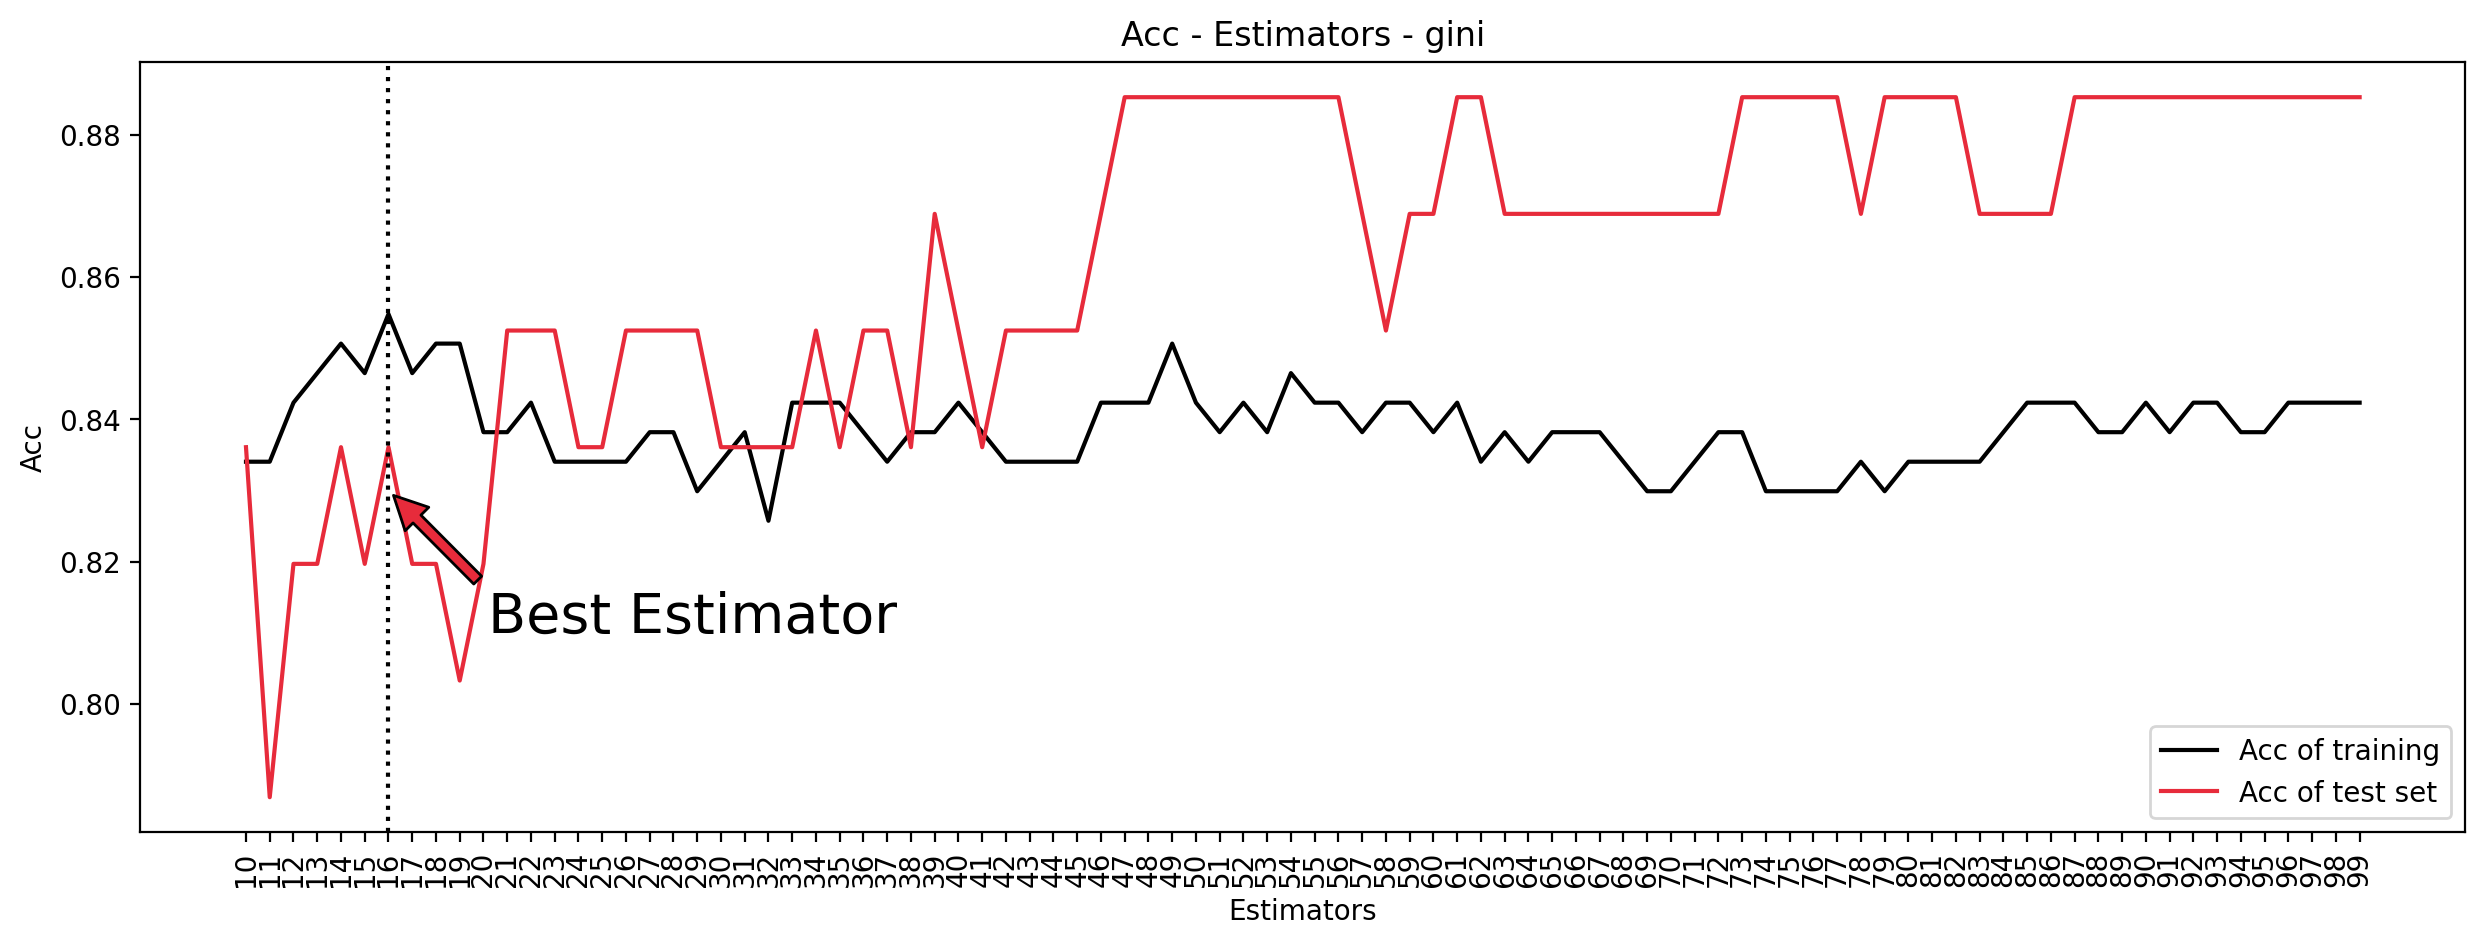

In [46]:
training_acc_6 = []
test_acc_6 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'gini', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_6.append(RF.score(X_train,y_train))
    test_acc_6.append(RF.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(n_estimators, training_acc_6, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - gini')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

**crietrion = gini and n_estimators = 16**

In [47]:
clf_6 = RandomForestClassifier(max_depth = 2, criterion= 'gini', random_state=40, n_estimators= 16)
clf_6.fit(X_train, y_train.ravel())
y_pred_6 = clf_6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))
Best_RF = metrics.accuracy_score(y_test,y_pred_6)

Accuracy 0.8360655737704918


**Confusion Matrix**

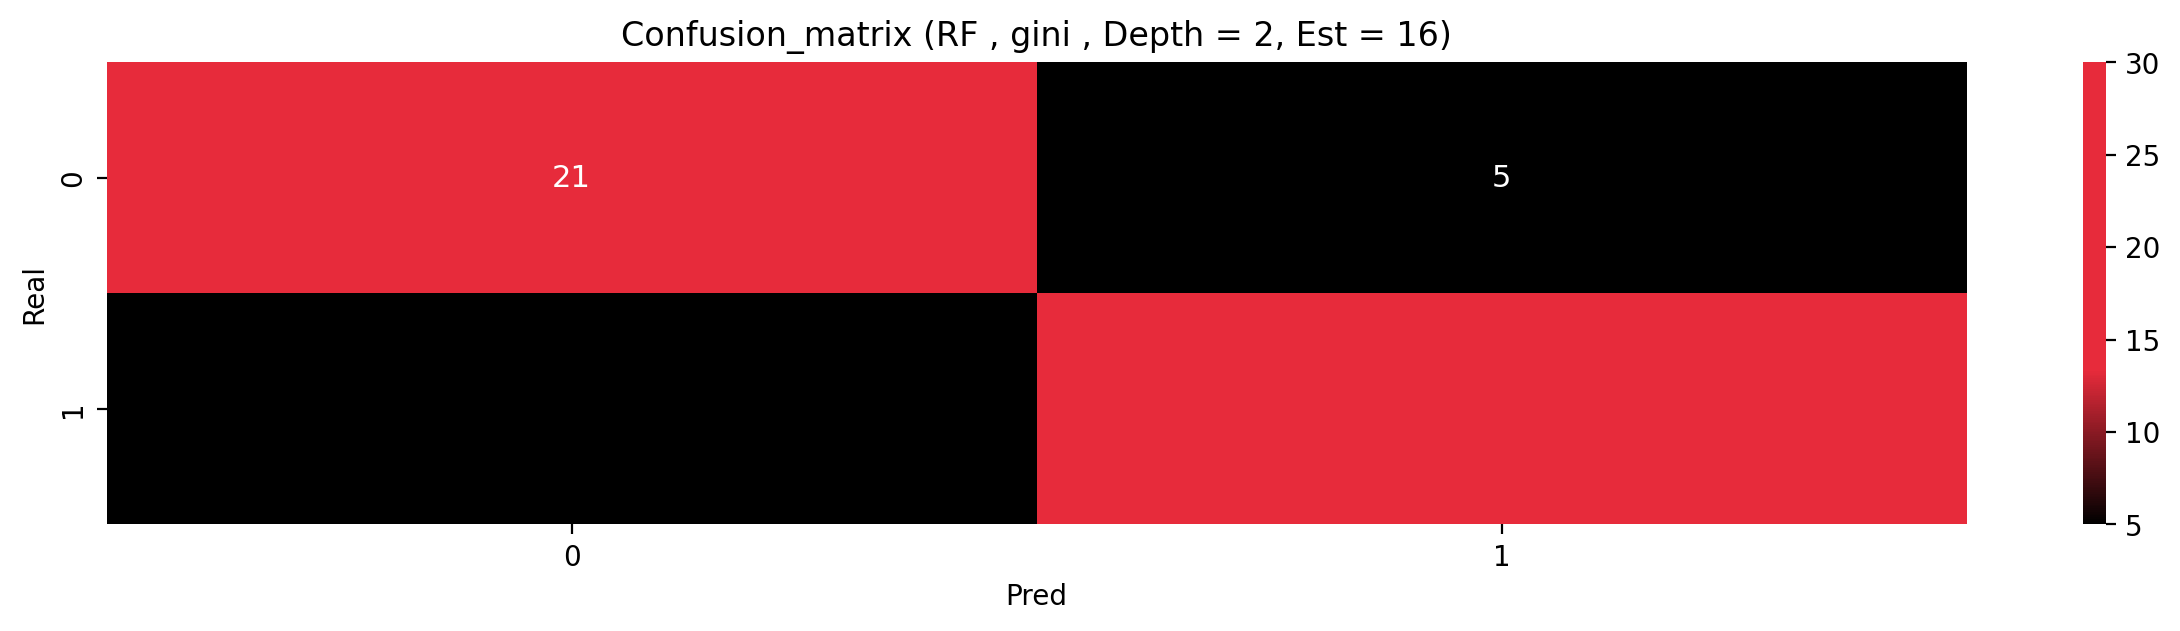

In [48]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**For criterion = entropy**

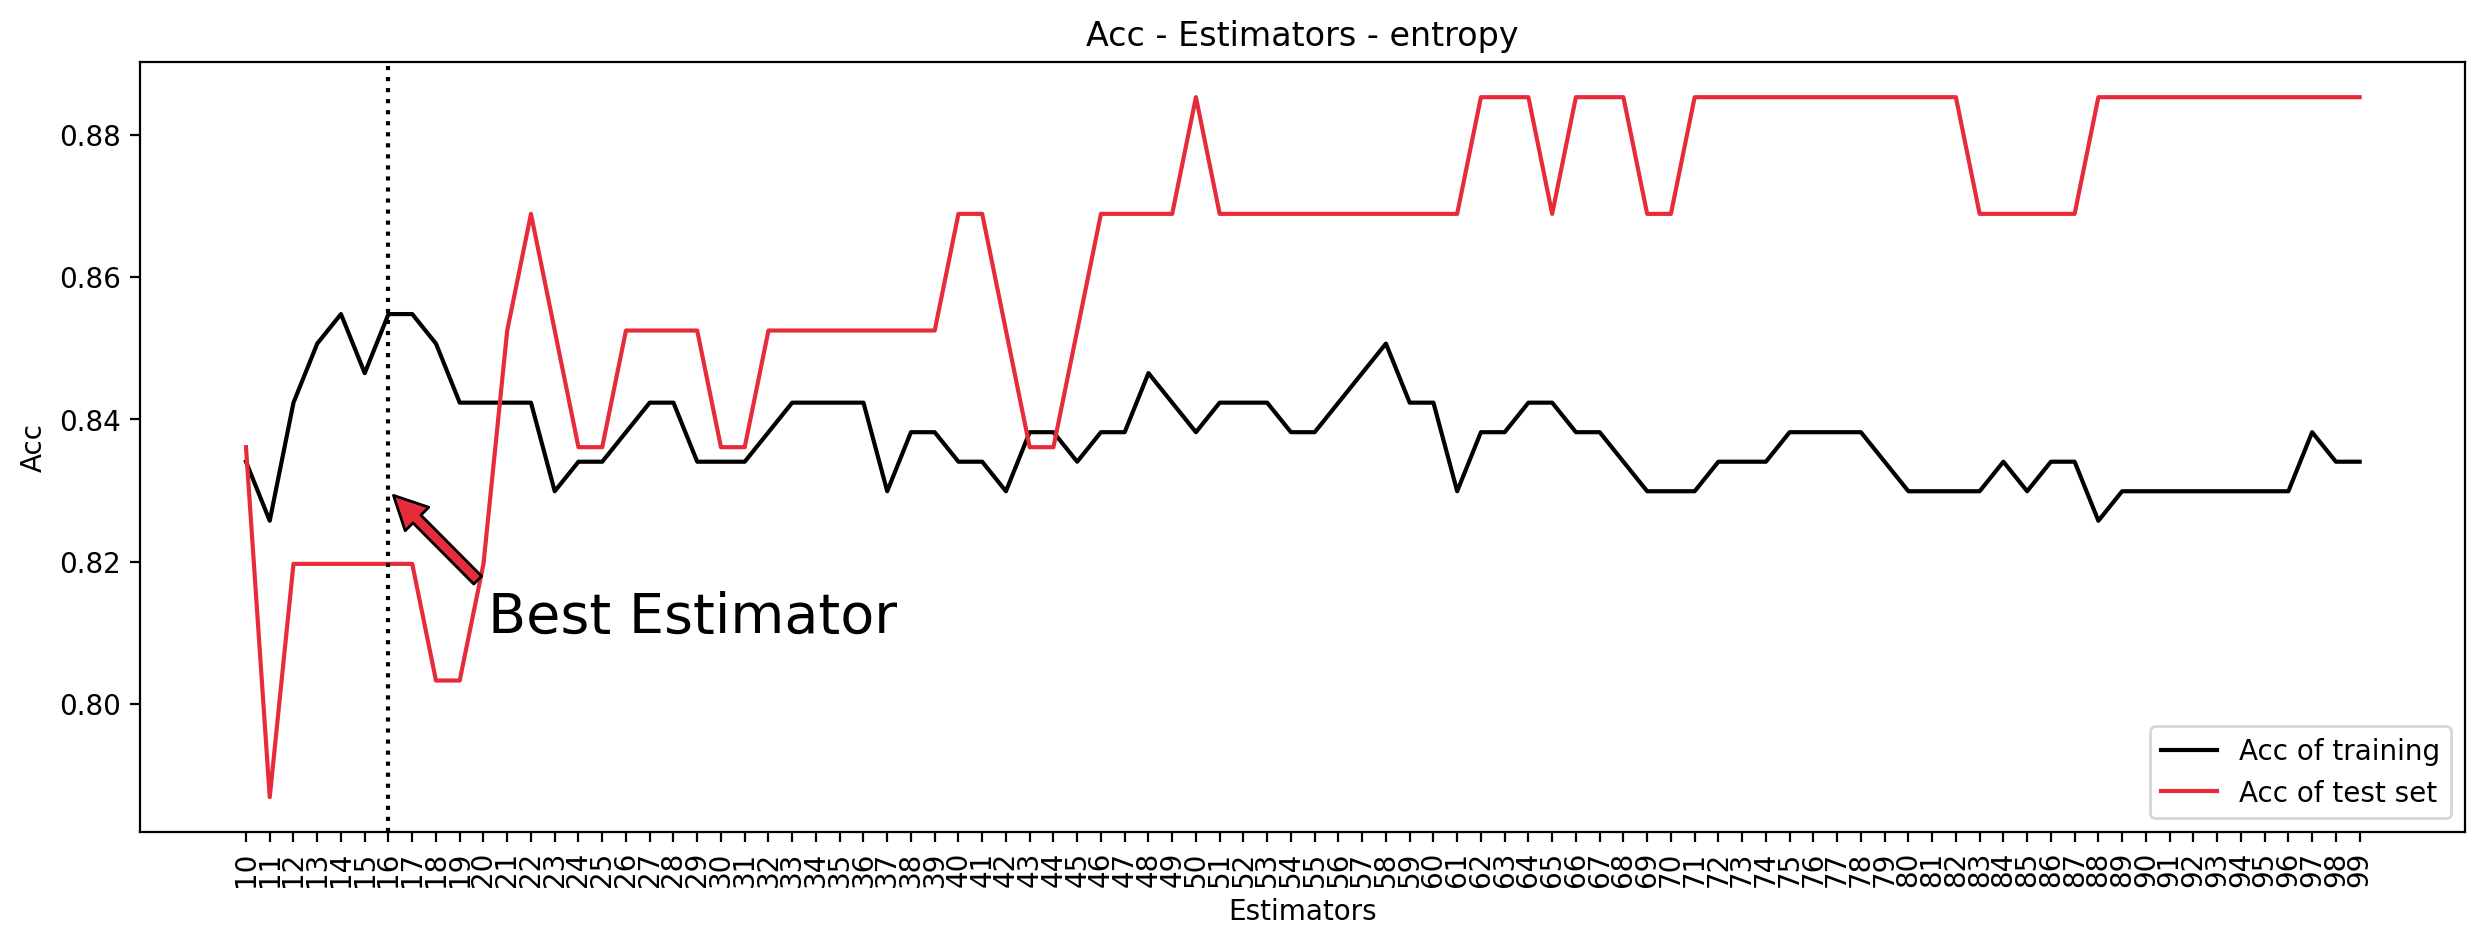

In [49]:
training_acc_7 = []
test_acc_7 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'entropy', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_7.append(RF.score(X_train,y_train))
    test_acc_7.append(RF.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(n_estimators, training_acc_7, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_7, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - entropy')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

**criterion = entropy and n_estimators = 16**

In [50]:
clf_7 = RandomForestClassifier(max_depth = 2, criterion= 'entropy', random_state=40, n_estimators= 16)
clf_7.fit(X_train, y_train.ravel())
y_pred_7 = clf_7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))

Accuracy 0.819672131147541


**Confusion Matrix**

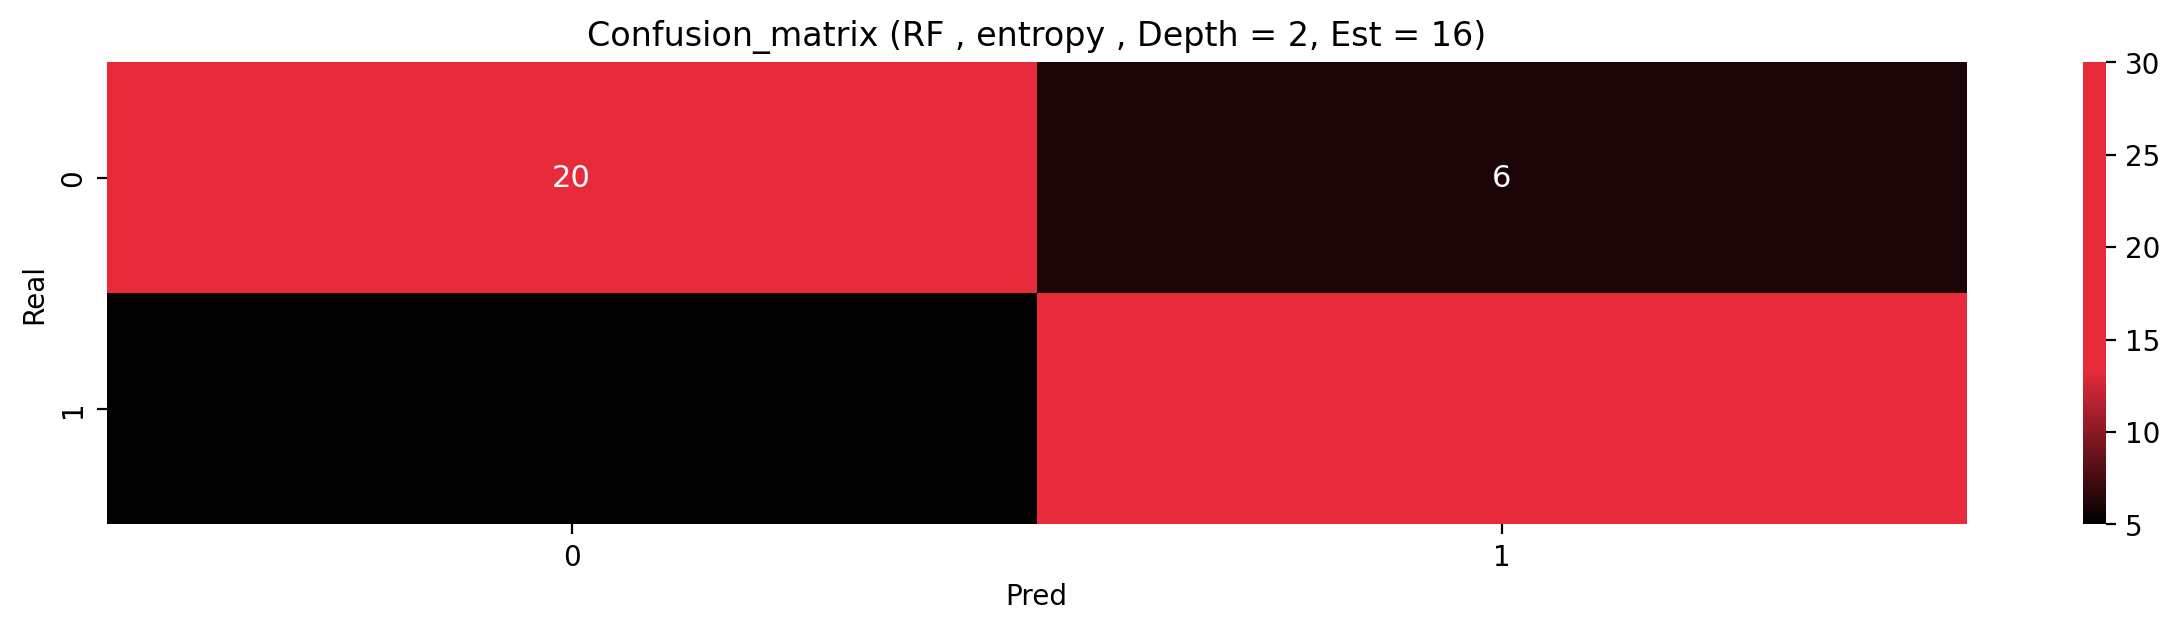

In [51]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , entropy , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**Classification Report**

In [52]:
print(classification_report(y_train, clf_6.predict(X_train)))
print(classification_report(y_train, clf_7.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       112
           1       0.83      0.91      0.87       129

    accuracy                           0.85       241
   macro avg       0.86      0.85      0.85       241
weighted avg       0.86      0.85      0.85       241

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       112
           1       0.83      0.91      0.87       129

    accuracy                           0.85       241
   macro avg       0.86      0.85      0.85       241
weighted avg       0.86      0.85      0.85       241





  - The samples in this dataset are really few because of that, Random forest and Decision trees didn't work well on this dataset. Instead of that, SVM and KNN worked well.
    



In [53]:
Best_models = pd.DataFrame({'Best_models_acc': [Best_DT, Best_knn, Best_RF, Best_SVM],
               'Best_models_name': ('Decision tree', 'KNN', 'Random Forest','SVM')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

,Best_models_acc,Best_models_name
3,0.934426,SVM
1,0.901639,KNN
0,0.852459,Decision tree
2,0.836066,Random Forest


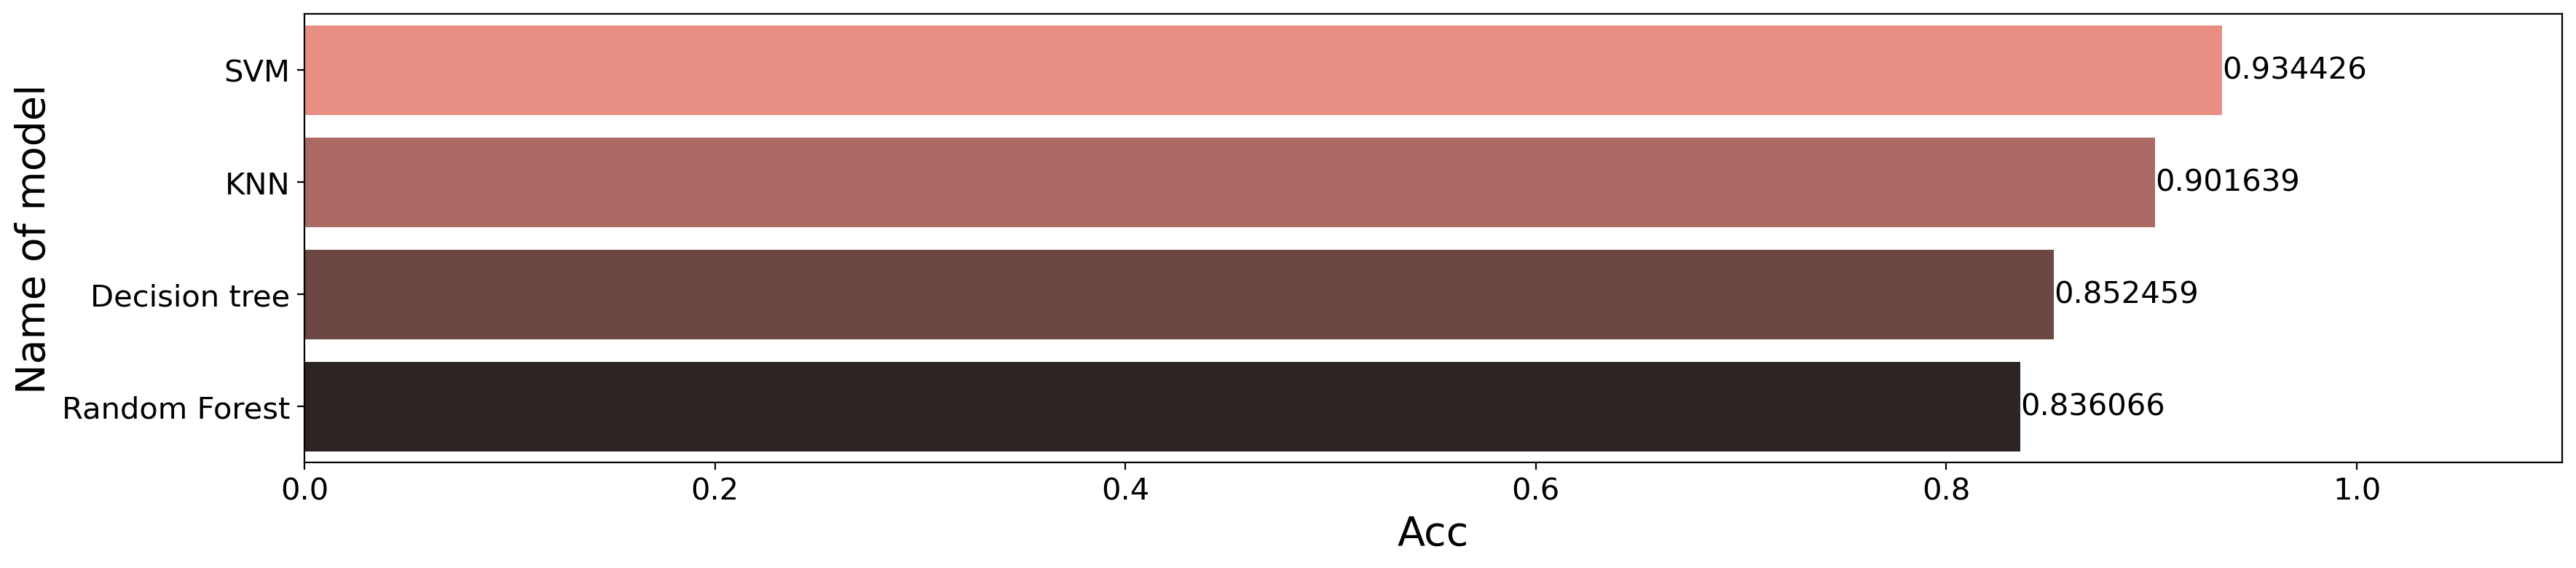

In [54]:
plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()

## Using Machine Learning

**Making Prediction for a Single DataPoint**

 - We used our best ML Model for making predictions ,passing several arguments taken from the user into our model as different fields and making a prediction out of it whether a has high rate of heart disease or lower rate of heart disease 

**Creating a pipeline**

In [55]:
pipe = make_pipeline(scaler,clf_3)
pipe.fit(X_train,y_train.ravel())

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=20, kernel='linear'))])

**Taking inputs from the user**

In [56]:
age      = int(input("Enter age between 25-80 : "))
sex      = int(input("Enter sex {0:female, 1:male} : "))
cp       = int(input("Enter Chest Pain type {Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic} : "))
trtbps   = int(input("Enter resting blood presssure(in mm Hg) {140-200} : "))
chol     = int(input("Enter cholestoral in mg/dl fetched via BMI sensor {120-425} : "))
fbs      = int(input("Enter fasting blood sugar > 120 mg/dl {1 = true; 0 = false} : "))
restecg  = int(input("Enter resting electrocardiographic results {Either 0,1,2} : "))
thalachh = int(input("Enter maximum heart rate achieved {90-200} : "))
exng     = int(input("Enter exercise induced angina (1 = yes, 0 = no) : "))
oldpeak  = float(input("Enter ST depression induced by exercise {0-6.5} : "))
slp      = int(input("Enter slope of the ST segment during peak exercise {0,1,2} : "))
caa      = int(input("Enter no. of major vessels {0-4} : "))
thall    = int(input("Enter thalassemia test result value {0,1,2,3} : "))

Enter age between 25-80 :  25
Enter sex {0:female, 1:male} :  0
Enter Chest Pain type {Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic} :  2
Enter resting blood presssure(in mm Hg) {140-200} :  150
Enter cholestoral in mg/dl fetched via BMI sensor {120-425} :  200
Enter fasting blood sugar > 120 mg/dl {1 = true; 0 = false} :  1
Enter resting electrocardiographic results {Either 0,1,2} :  2
Enter maximum heart rate achieved {90-200} :  100
Enter exercise induced angina (1 = yes, 0 = no) :  1
Enter ST depression induced by exercise {0-6.5} :  1.2
Enter slope of the ST segment during peak exercise {0,1,2} :  1
Enter no. of major vessels {0-4} :  2
Enter thalassemia test result value {0,1,2,3} :  3


**Finding the Result**

In [57]:
result = pipe.predict(pd.DataFrame([[age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]], columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']))
if(result[0] == 0):
    print("Lower risk of Heart Disease")
else:
    print("Higher risk of heart Disease")

Lower risk of Heart Disease
